In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([df,test])
df.drop(["TXN_TRM"], 1, inplace = True)
df.rename(columns = {"TARGET": "target"}, inplace = True)
df.loc[df.TXN_SOURCE == "R", "TXN_SOURCE"] ="O"
df = df.sort_values(["DAY_OF_MONTH", "CST_NR"])

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_9444/3526205601.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["TXN_TRM"], 1, inplace = True)


In [2]:
def calc_count(df, by, on, m):
    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']


    # Replace each value by the according smoothed mean
    return df[by].map(counts)

In [3]:
df["hours_txn_time"] = df.TXN_TIME.transform(lambda x : str(x)[:2] if len(str(x)) == 6 else str(x)[:1])
df.hours_txn_time = df.hours_txn_time.astype(int)
df["time"] = (df.DAY_OF_MONTH * 24) + (df.hours_txn_time)
df.drop(["TXN_TIME"], 1, inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_9444/1570018154.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["TXN_TIME"], 1, inplace = True)


In [4]:
df["same_day_MCC_CODE_count"] = df.groupby(["CST_NR", "DAY_OF_MONTH"])["MCC_CODE"].transform("nunique");df["ada"] = 1
#df["same_day_MC_NAME_count"] = df.groupby(["CST_NR", "DAY_OF_MONTH"])["MC_NAME"].transform("nunique")
#df["same_day_MC_ID_count"] = df.groupby(["CST_NR", "DAY_OF_MONTH"])["MC_ID"].transform("nunique")
df["same_day_CITY_count"] = df.groupby(["CST_NR", "DAY_OF_MONTH"])["CITY"].transform("nunique")
df["same_day_COUNTRY_count"] = df.groupby(["CST_NR", "DAY_OF_MONTH"])["COUNTRY"].transform("nunique")

In [5]:
df['country_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='COUNTRY', on='ada', m=100)
df['city_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='CITY', on='ada', m=100)
df['mc_name_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='MC_NAME', on='ada', m=100)
df['mc_id_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='MC_ID', on='ada', m=100)
df['mcc_code_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='MCC_CODE', on='ada', m=100)

In [6]:
categorylabels = ['CST_NR', 'CC_NR',
       'TXN_SOURCE', 'TXN_ENTRY','CITY', 'COUNTRY', 'MC_NAME',
       'MC_ID', 'MCC_CODE',"hours_txn_time"]
numericlabels = ["TXN_AMNT", "time"]

In [7]:
df["number_of_cards_owned_per_cust"] = df.groupby("CST_NR")["CC_NR"].transform("nunique")
df["number_of_transactions_done_total"] = df.groupby(["CST_NR"])["ada"].transform("sum")
df["transaction_no"] = df.groupby("CST_NR")["ada"].transform("cumsum")

# PARA HARCAMALARLA İLGİLİ KISIM   " TXN_AMNT "

df["total_money_spent_mean"] = df.groupby(["CST_NR"])["TXN_AMNT"].transform("mean")
df["total_money_spent"] = df.groupby(["CST_NR"])["TXN_AMNT"].transform("sum")
df["total_money_spent_cumsum"] = df.groupby(["CST_NR"])["TXN_AMNT"].transform("cumsum")
df["total_money_spent_std"] = df.groupby(["CST_NR"])["TXN_AMNT"].transform("std")

df["amount_change_ratio_between_tx"] = df.groupby(["CST_NR"])["TXN_AMNT"].transform("pct_change")
df["time_change_ratio_between_tx"] = df.groupby(["CST_NR"])["time"].transform("pct_change")


In [8]:
df.drop(["DAY_OF_MONTH", "DAY_OF_WEEK", "ada"], 1, inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_9444/4125607324.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["DAY_OF_MONTH", "DAY_OF_WEEK", "ada"], 1, inplace = True)


In [9]:
df["MC_NAME_COUNTRY"] = df.MC_NAME.astype(str) + "_"+ df.COUNTRY.astype(str)
df["MC_ID_COUNTRY"] = df.MC_ID.astype(str) + "_"+ df.COUNTRY.astype(str)
df["MCC_COUNTRY"] = df.MCC_CODE.astype(str) + "_"+ df.COUNTRY.astype(str)
df["MC_NAME_COUNTRY"] = df.MC_NAME.astype(str) + "_"+ df.COUNTRY.astype(str)

df["MC_NAME_CITY"] = df.MC_NAME.astype(str) + "_"+ df.CITY.astype(str)
df["MC_ID_CITY"] = df.MC_ID.astype(str) + "_"+ df.CITY.astype(str)
df["MCC_CITY"] = df.MCC_CODE.astype(str) + "_"+ df.CITY.astype(str)
df["MC_NAME_CITY"] = df.MC_NAME.astype(str) + "_"+ df.CITY.astype(str)

df["CST_NR_TXN_ENTRY"] = df.CST_NR.astype(str) + "_"+ df.TXN_ENTRY.astype(str)
df["CST_NR_COUNTRY"] = df.CST_NR.astype(str) + "_"+ df.COUNTRY.astype(str)
df["CST_NR_MCC_CODE"] = df.CST_NR.astype(str) + "_"+ df.MCC_CODE.astype(str)
df["MCC_CODE_TXN_ENTRY"] = df.MCC_CODE.astype(str) + "_"+ df.TXN_ENTRY.astype(str)

In [10]:
categorylabels = ['CST_NR',
 'CC_NR',
 'TXN_SOURCE',
 'TXN_ENTRY',
 'CITY',
 'COUNTRY',
 'MC_NAME',
 'MC_ID',
 'MCC_CODE',
 'hours_txn_time','MC_NAME_COUNTRY',
          'MC_ID_COUNTRY', 'MCC_COUNTRY',
       'MC_NAME_CITY', 'MC_ID_CITY', 'MCC_CITY', 'CST_NR_TXN_ENTRY',
       'CST_NR_COUNTRY', 'CST_NR_MCC_CODE', 'MCC_CODE_TXN_ENTRY']

In [11]:
train = df.loc[df.target.notnull()]
test = df.loc[df.target.isnull()]

In [12]:
import pandas as pd
from sklearn.metrics import roc_auc_score
cat_feat_to_encode = categorylabels;  smoothing=0.15
train_y = train['target']
import category_encoders as ce
oof = pd.DataFrame([])
from sklearn.model_selection import StratifiedKFold
for tr_idx, oof_idx in StratifiedKFold(n_splits=5, random_state=2020, shuffle=True).split(train, train_y):
    print("***********")
    ce_target_encoder = ce.TargetEncoder(cols = cat_feat_to_encode, smoothing=smoothing)
    ce_target_encoder.fit(train.iloc[tr_idx, :], train_y.iloc[tr_idx])
    oof = oof.append(ce_target_encoder.transform(train.iloc[oof_idx, :]), ignore_index=False)
ce_target_encoder = ce.TargetEncoder(cols = cat_feat_to_encode, smoothing=smoothing)
ce_target_encoder.fit(train, train_y);  train = oof.sort_index();
test = ce_target_encoder.transform(test)
train.loc[train.amount_change_ratio_between_tx > 5000000, "amount_change_ratio_between_tx"] = 0
test.loc[test.amount_change_ratio_between_tx > 5000000, "amount_change_ratio_between_tx"] = 0

***********
***********
***********
***********
***********


In [13]:
import lightgbm as lgb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import os
import lightgbm
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, StratifiedKFold

In [14]:
train['TXN_AMNT'] = np.log1p(train['TXN_AMNT'])
test['TXN_AMNT'] = np.log1p(test['TXN_AMNT'])

In [144]:
X = train.drop(["ID", "target"], 1)
y = train.target

In [135]:
X = train.drop(["ID", "target"], 1)
y = train.target
test_x = test.drop(["ID", "target"], 1)
test_y = test.target

In [45]:
train.columns

Index(['target', 'CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_ENTRY', 'TXN_AMNT',
       'CITY', 'COUNTRY', 'MC_NAME', 'MC_ID', 'MCC_CODE', 'ID',
       'hours_txn_time', 'time', 'same_day_MCC_CODE_count',
       'same_day_MC_ID_count', 'same_day_CITY_count', 'same_day_COUNTRY_count',
       'country_count', 'city_target_count', 'mc_name_target_count',
       'mc_id_target_count', 'mcc_code_target_count',
       'number_of_cards_owned_per_cust', 'number_of_transactions_done_total',
       'transaction_no', 'total_money_spent_mean', 'total_money_spent',
       'total_money_spent_cumsum', 'total_money_spent_std',
       'amount_change_ratio_between_tx', 'time_change_ratio_between_tx',
       'user_rank'],
      dtype='object')

In [148]:
kf = StratifiedKFold(n_splits=5)
auc = 0
best_score = 0.9889724884584258
for j in ['user_rank', 'MC_NAME_COUNTRY', 'MC_ID_COUNTRY', 'MCC_COUNTRY',
       'MC_NAME_CITY', 'MC_ID_CITY', 'MCC_CITY', 'CST_NR_TXN_ENTRY',
       'CST_NR_COUNTRY', 'CST_NR_MCC_CODE', 'MCC_CODE_TXN_ENTRY']:
    auc = 0
    if j in ["ID", "target",'CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_ENTRY', 'TXN_AMNT',
       'CITY']:
        continue
    else:
        X = train.drop(["ID", "target", j], 1)
        y = train.target

    for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        print(f"\n----- FOLD {i} -----")

        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[test_idx]
        y_val = y.iloc[test_idx]


        clf = lgbm.LGBMClassifier(objective = "binary", random_state=42,
            n_estimators=2000,
            max_depth=12, 
            learning_rate=0.02, 
            subsample=0.8,
            colsample_bytree=0.4, 
            metric='auc',
            # USE CPU
            nthread=4,
            boosting_type='gbdt', 
            # USE GPU
            #tree_method='gpu_hist' 
    )
        h = clf.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)],
            verbose=50, early_stopping_rounds=100)
        auc += roc_auc_score(y_val,clf.predict_proba(X_val)[:,1])
    if auc/5 > best_score:
        print("new_auc_is {} , that was achieved by dropping {}".format(auc/5, j))
        train.drop([j], 1, inplace = True)
        best_score = auc/5
    print("without {} auc is {}".format(j, auc/5))


----- FOLD 0 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.985984
[100]	valid_0's auc: 0.987318
[150]	valid_0's auc: 0.988457
[200]	valid_0's auc: 0.989049
[250]	valid_0's auc: 0.989179
[300]	valid_0's auc: 0.989284
[350]	valid_0's auc: 0.989326
[400]	valid_0's auc: 0.989464
[450]	valid_0's auc: 0.989574
[500]	valid_0's auc: 0.989599
[550]	valid_0's auc: 0.989642
[600]	valid_0's auc: 0.989651
[650]	valid_0's auc: 0.989707
[700]	valid_0's auc: 0.989738
[750]	valid_0's auc: 0.989757
[800]	valid_0's auc: 0.98983
[850]	valid_0's auc: 0.989826
[900]	valid_0's auc: 0.989826
[950]	valid_0's auc: 0.989841

----- FOLD 1 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.978585
[100]	valid_0's auc: 0.981958
[150]	valid_0's auc: 0.982715
[200]	valid_0's auc: 0.983452
[250]	valid_0's auc: 0.983966
[300]	valid_0's a

[100]	valid_0's auc: 0.987611
[150]	valid_0's auc: 0.98831
[200]	valid_0's auc: 0.988635
[250]	valid_0's auc: 0.988983
[300]	valid_0's auc: 0.989351
[350]	valid_0's auc: 0.989544
[400]	valid_0's auc: 0.989738
[450]	valid_0's auc: 0.989815
[500]	valid_0's auc: 0.989811
[550]	valid_0's auc: 0.989869
[600]	valid_0's auc: 0.989987
[650]	valid_0's auc: 0.99002
[700]	valid_0's auc: 0.990059
[750]	valid_0's auc: 0.990013
[800]	valid_0's auc: 0.989936

----- FOLD 1 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.979456
[100]	valid_0's auc: 0.982606
[150]	valid_0's auc: 0.983362
[200]	valid_0's auc: 0.983583
[250]	valid_0's auc: 0.9838
[300]	valid_0's auc: 0.98441
[350]	valid_0's auc: 0.984771
[400]	valid_0's auc: 0.984953
[450]	valid_0's auc: 0.985054
[500]	valid_0's auc: 0.985068
[550]	valid_0's auc: 0.985139
[600]	valid_0's auc: 0.985209
[650]	valid_0's auc: 0.985306
[700]	valid_0's auc: 0.985403
[75

[600]	valid_0's auc: 0.990417
[650]	valid_0's auc: 0.990441
[700]	valid_0's auc: 0.990424
[750]	valid_0's auc: 0.990405

----- FOLD 1 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.980777
[100]	valid_0's auc: 0.981994
[150]	valid_0's auc: 0.982959
[200]	valid_0's auc: 0.983182
[250]	valid_0's auc: 0.983765
[300]	valid_0's auc: 0.984095
[350]	valid_0's auc: 0.984518
[400]	valid_0's auc: 0.984693
[450]	valid_0's auc: 0.984664
[500]	valid_0's auc: 0.984699
[550]	valid_0's auc: 0.984615

----- FOLD 2 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.983632
[100]	valid_0's auc: 0.986941
[150]	valid_0's auc: 0.987956
[200]	valid_0's auc: 0.988411
[250]	valid_0's auc: 0.98881
[300]	valid_0's auc: 0.989041
[350]	valid_0's auc: 0.989253
[400]	valid_0's auc: 0.989319
[450]	valid_0's auc: 0.989374
[500]	valid_0's a

[400]	valid_0's auc: 0.984333
[450]	valid_0's auc: 0.984338
[500]	valid_0's auc: 0.984405
[550]	valid_0's auc: 0.984397

----- FOLD 2 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.984236
[100]	valid_0's auc: 0.986355
[150]	valid_0's auc: 0.987215
[200]	valid_0's auc: 0.988052
[250]	valid_0's auc: 0.988435
[300]	valid_0's auc: 0.988758
[350]	valid_0's auc: 0.989012
[400]	valid_0's auc: 0.989171
[450]	valid_0's auc: 0.989177
[500]	valid_0's auc: 0.989158
[550]	valid_0's auc: 0.989293
[600]	valid_0's auc: 0.989353
[650]	valid_0's auc: 0.989344
[700]	valid_0's auc: 0.989395
[750]	valid_0's auc: 0.989381
[800]	valid_0's auc: 0.989401

----- FOLD 3 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.989996
[100]	valid_0's auc: 0.989858
[150]	valid_0's auc: 0.99033
[200]	valid_0's auc: 0.990284
[250]	valid_0's a

In [ ]:
['fav_amount_for_user', 'fav_time_for_user',
       'city_is_suspicious', 'country_is_suspicious', 'entry_is_suspicious',
       'mc_id_is_suspicious', 'source_is_suspicious']

In [150]:
df.columns.difference(X.columns)

Index(['ID', 'MCC_CODE_TXN_ENTRY', 'MCC_COUNTRY', 'MC_NAME_COUNTRY', 'target',
       'user_rank'],
      dtype='object')

In [16]:
df.drop(['MCC_COUNTRY', 'MC_NAME_COUNTRY'],1, inplace = True)
#0.989319724705695

In [145]:

auc = 0
for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f"\n----- FOLD {i} -----")

    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_val = X.iloc[test_idx]
    y_val = y.iloc[test_idx]


    clf = lgbm.LGBMClassifier(objective = "binary", random_state=42,
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        metric='auc',
        # USE CPU
        nthread=4,
        boosting_type='gbdt', 
        # USE GPU
        #tree_method='gpu_hist' 
)
    h = clf.fit(X_train, y_train, 
        eval_set=[(X_val, y_val)],
        verbose=50, early_stopping_rounds=100)
    auc += roc_auc_score(y_val,clf.predict_proba(X_val)[:,1])
print(auc /5)


----- FOLD 0 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.985661
[100]	valid_0's auc: 0.987587
[150]	valid_0's auc: 0.988138
[200]	valid_0's auc: 0.988549
[250]	valid_0's auc: 0.988865
[300]	valid_0's auc: 0.989196
[350]	valid_0's auc: 0.989396
[400]	valid_0's auc: 0.989506
[450]	valid_0's auc: 0.989717
[500]	valid_0's auc: 0.989836
[550]	valid_0's auc: 0.989795

----- FOLD 1 -----
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[50]	valid_0's auc: 0.979155
[100]	valid_0's auc: 0.981397
[150]	valid_0's auc: 0.982591
[200]	valid_0's auc: 0.9831
[250]	valid_0's auc: 0.983618
[300]	valid_0's auc: 0.983935
[350]	valid_0's auc: 0.984357
[400]	valid_0's auc: 0.98453
[450]	valid_0's auc: 0.984486
[500]	valid_0's auc: 0.984581
[550]	valid_0's auc: 0.984752
[600]	valid_0's auc: 0.984832
[650]	valid_0's auc: 0.984887
[700]	valid_0's auc

In [95]:
train.columns

Index(['target', 'CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_ENTRY', 'TXN_AMNT',
       'CITY', 'COUNTRY', 'MC_NAME', 'MC_ID', 'MCC_CODE', 'ID',
       'hours_txn_time', 'time', 'same_day_MCC_CODE_count',
       'same_day_CITY_count', 'same_day_COUNTRY_count', 'country_count',
       'city_target_count', 'mc_name_target_count', 'mc_id_target_count',
       'mcc_code_target_count', 'number_of_cards_owned_per_cust',
       'number_of_transactions_done_total', 'transaction_no',
       'total_money_spent_mean', 'total_money_spent',
       'total_money_spent_cumsum', 'total_money_spent_std',
       'amount_change_ratio_between_tx', 'time_change_ratio_between_tx',
       'user_rank', 'fav_amount_for_user', 'fav_time_for_user',
       'city_is_suspicious', 'country_is_suspicious', 'entry_is_suspicious',
       'mc_id_is_suspicious', 'source_is_suspicious'],
      dtype='object')

In [47]:
#0.9887996467835262  

Index(['target', 'CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_ENTRY', 'TXN_AMNT',
       'CITY', 'COUNTRY', 'MC_NAME', 'MC_ID', 'MCC_CODE', 'ID',
       'hours_txn_time', 'time', 'same_day_MCC_CODE_count',
       'same_day_CITY_count', 'same_day_COUNTRY_count', 'country_count',
       'city_target_count', 'mc_name_target_count', 'mc_id_target_count',
       'mcc_code_target_count', 'number_of_cards_owned_per_cust',
       'number_of_transactions_done_total', 'transaction_no',
       'total_money_spent_mean', 'total_money_spent',
       'total_money_spent_cumsum', 'total_money_spent_std',
       'amount_change_ratio_between_tx', 'time_change_ratio_between_tx',
       'user_rank'],
      dtype='object')

In [48]:
df.columns.difference(train.columns)

Index(['same_day_MC_ID_count'], dtype='object')

In [17]:
df.drop(["same_day_MC_ID_count"], 1,inplace = True)
test.drop(["same_day_MC_ID_count"], 1,inplace = True)

KeyError: "['same_day_MC_ID_count'] not found in axis"

In [93]:
#SAME_DAY_MC_NAME_COUNT atilmali.
#same day mc id de atilmali!
#0.9887996467835262  

In [18]:
train.drop(["fav_amount_for_user", "fav_time_for_user"], 1, inplace = True)

KeyError: "['fav_amount_for_user' 'fav_time_for_user'] not found in axis"

In [123]:
test_small_transformed.drop(["fav_amount_for_user", "fav_time_for_user"], 1, inplace = True)

In [19]:
X= train.drop(["ID", "target"],1)
y = train.target
Y = y

In [23]:
# Constant
K = 10

X_TEST = test.drop(["ID", "target"],1)
BEST_PARAMS = {
    'n_estimators': 10000, # Waiting for early-stopping
    'learning_rate': 0.05, # Me
    'metric': 'auc', # Me,
    "objective": "binary"
}

In [24]:
# Objective function
def objective(trial):
    # Search spaces
    hyperparams = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200)
    }
    
    # Add BEST_PARAMS
    hyperparams.update(BEST_PARAMS)
    
    # Evaluation
    scores = kfold_evaluation(X, Y, K, hyperparams, 100)
    
    return scores['validation score'].mean()

In [25]:
# Functions for KFold evaluation
def create(hyperparams):
    """Create LGBM Classifier for a given set of hyper-parameters."""
    model = LGBMClassifier(**hyperparams)
    return model

def fit(model, X, y):
    """Simple training of a given model."""
    model.fit(X, y)
    return model

def fit_with_stop(model, X, y, X_val, y_val, esr):
    """Advanced training with early stopping."""
    model.fit(X, y,
              eval_set=(X_val, y_val),
              early_stopping_rounds=esr, 
              verbose=200)
    return model

def evaluate(model, X, y):
    """Compute AUC for a given model."""
    yp = model.predict_proba(X)[:, 1]
    auc_score = roc_auc_score(y, yp)
    return auc_score

def kfold_evaluation(X, y, k, hyperparams, esr=100):
    """Run a KFlod evaluation."""
    scores = []
    
    print(f"\n------ {k}-fold evaluation -----")
    print(hyperparams)
    
    kf = KFold(k)
    for i, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\n----- FOLD {i} -----")
        
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[test_idx]
        y_val = y.iloc[test_idx]
        
        model = create(hyperparams)
        model = fit_with_stop(model, X_train, y_train, X_val, y_val, esr)
        train_score = evaluate(model, X_train, y_train)
        val_score = evaluate(model, X_val, y_val)
        scores.append((train_score, val_score))
        
        print(f"Fold {i} | Eval AUC: {val_score}")
        
        
    scores = pd.DataFrame(scores, columns=['train score', 'validation score'])
    
    return scores

def kfold_prediction(X, y, X_test, k, hyperparams, esr=100):
    """Make predictions with a bagged model based on KFold."""
    yp = np.zeros(len(X_test))
    
    print(f"\n------ {k}-fold evaluation -----")
    print(hyperparams)
    
    kf = StratifiedKFold(n_splits= 5)
    for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        print(f"\n----- FOLD {i} -----")
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[test_idx]
        y_val = y.iloc[test_idx]
        
        model = create(hyperparams)
        model = fit_with_stop(model, X_train, y_train, X_val, y_val, esr)
        yp += model.predict_proba(X_test)[:, 1] / k
    
    return yp

In [26]:
# Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=3600*0.45, n_jobs= -1)

[I 2021-11-27 01:09:52,930] A new study created in memory with name: no-name-e5fa37ea-1c5e-411f-8bfb-56469b7d4d8f



------ 10-fold evaluation -----
{'reg_alpha': 6.293767816948847, 'reg_lambda': 7.722775584717656, 'num_leaves': 300, 'min_child_samples': 32, 'max_depth': 23, 'colsample_bytree': 0.13363419112586247, 'cat_smooth': 22, 'cat_l2': 5, 'min_data_per_group': 139, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

------ 10-fold evaluation -----
{'reg_alpha': 6.164930772333364, 'reg_lambda': 1.9528648619270828, 'num_leaves': 174, 'min_child_samples': 48, 'max_depth': 46, 'colsample_bytree': 0.34963911060319625, 'cat_smooth': 56, 'cat_l2': 9, 'min_data_per_group': 115, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

------ 10-fold evaluation -----
{'reg_alpha': 7.415666811435065, 'reg_lambda': 5.473073164519951, 'num_leaves': 881, 'min_child_samples': 9, 'max_depth': 64, 'colsample_bytree': 0.2091632910618953, 'cat_smooth': 73, 'cat_l2': 9, 'min_data_per_group': 122, 'n_estimators': 10000, 'learning_rate': 0.05, 'metri

[I 2021-11-27 01:23:27,134] Trial 3 finished with value: 0.9892256009550133 and parameters: {'reg_alpha': 6.4456084699997485, 'reg_lambda': 1.615816512782335, 'num_leaves': 493, 'min_child_samples': 90, 'max_depth': 10, 'colsample_bytree': 0.29790462117691613, 'cat_smooth': 97, 'cat_l2': 13, 'min_data_per_group': 194}. Best is trial 3 with value: 0.9892256009550133.


Fold 9 | Eval AUC: 0.9924250369838635

------ 10-fold evaluation -----
{'reg_alpha': 5.494349901251622, 'reg_lambda': 6.085916802092466, 'num_leaves': 711, 'min_child_samples': 10, 'max_depth': 44, 'colsample_bytree': 0.37302747090507293, 'cat_smooth': 11, 'cat_l2': 20, 'min_data_per_group': 155, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

----- FOLD 0 -----


[I 2021-11-27 01:23:31,936] Trial 4 finished with value: 0.9892425710895465 and parameters: {'reg_alpha': 8.461749176419977, 'reg_lambda': 2.092376881607297, 'num_leaves': 372, 'min_child_samples': 98, 'max_depth': 36, 'colsample_bytree': 0.46613594272995384, 'cat_smooth': 97, 'cat_l2': 10, 'min_data_per_group': 132}. Best is trial 4 with value: 0.9892425710895465.


Fold 9 | Eval AUC: 0.9921268031082615

------ 10-fold evaluation -----
{'reg_alpha': 8.871985094285218, 'reg_lambda': 3.082923180739616, 'num_leaves': 150, 'min_child_samples': 5, 'max_depth': 27, 'colsample_bytree': 0.3190644952360713, 'cat_smooth': 44, 'cat_l2': 1, 'min_data_per_group': 150, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

----- FOLD 0 -----
Fold 4 | Eval AUC: 0.9877445714305132

----- FOLD 5 -----
[400]	valid_0's auc: 0.987472
[200]	valid_0's auc: 0.987053
Fold 7 | Eval AUC: 0.9908072266159261

----- FOLD 8 -----
[600]	valid_0's auc: 0.987742
Fold 4 | Eval AUC: 0.9876203469837829

----- FOLD 5 -----
[200]	valid_0's auc: 0.989038
[200]	valid_0's auc: 0.989572
Fold 5 | Eval AUC: 0.9920899454889094

----- FOLD 6 -----
Fold 6 | Eval AUC: 0.9877807499774464

----- FOLD 7 -----
Fold 0 | Eval AUC: 0.989148206348722

----- FOLD 1 -----
Fold 8 | Eval AUC: 0.9897141037955881

----- FOLD 9 -----
[200]	valid_0's auc: 0.988553
[200]	valid_0'

[I 2021-11-27 01:26:48,814] Trial 1 finished with value: 0.9892578387763645 and parameters: {'reg_alpha': 6.164930772333364, 'reg_lambda': 1.9528648619270828, 'num_leaves': 174, 'min_child_samples': 48, 'max_depth': 46, 'colsample_bytree': 0.34963911060319625, 'cat_smooth': 56, 'cat_l2': 9, 'min_data_per_group': 115}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9919249024842567

------ 10-fold evaluation -----
{'reg_alpha': 1.689796266532604, 'reg_lambda': 1.0835557140942929, 'num_leaves': 626, 'min_child_samples': 40, 'max_depth': 14, 'colsample_bytree': 0.10198365293889095, 'cat_smooth': 42, 'cat_l2': 19, 'min_data_per_group': 117, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

----- FOLD 0 -----
Fold 8 | Eval AUC: 0.9885674722974656

----- FOLD 9 -----


[I 2021-11-27 01:27:24,022] Trial 2 finished with value: 0.9886202406976888 and parameters: {'reg_alpha': 7.415666811435065, 'reg_lambda': 5.473073164519951, 'num_leaves': 881, 'min_child_samples': 9, 'max_depth': 64, 'colsample_bytree': 0.2091632910618953, 'cat_smooth': 73, 'cat_l2': 9, 'min_data_per_group': 122}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9916587259276248

------ 10-fold evaluation -----
{'reg_alpha': 9.295242929655348, 'reg_lambda': 8.276947446933029, 'num_leaves': 654, 'min_child_samples': 72, 'max_depth': 33, 'colsample_bytree': 0.12792657554704556, 'cat_smooth': 30, 'cat_l2': 10, 'min_data_per_group': 153, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

----- FOLD 0 -----
Fold 6 | Eval AUC: 0.9884848241719878

----- FOLD 7 -----
[200]	valid_0's auc: 0.983856
[200]	valid_0's auc: 0.988528
[200]	valid_0's auc: 0.987925
[200]	valid_0's auc: 0.991056
[200]	valid_0's auc: 0.987452
[200]	valid_0's auc: 0.991215
Fold 2 | Eval AUC: 0.9841966450025283

----- FOLD 3 -----
Fold 7 | Eval AUC: 0.9920126771133616

----- FOLD 8 -----
[200]	valid_0's auc: 0.988655
[400]	valid_0's auc: 0.988996
[400]	valid_0's auc: 0.991693
Fold 6 | Eval AUC: 0.9886108543945058

----- FOLD 7 -----


[I 2021-11-27 01:28:37,026] Trial 0 finished with value: 0.9889588471923079 and parameters: {'reg_alpha': 6.293767816948847, 'reg_lambda': 7.722775584717656, 'num_leaves': 300, 'min_child_samples': 32, 'max_depth': 23, 'colsample_bytree': 0.13363419112586247, 'cat_smooth': 22, 'cat_l2': 5, 'min_data_per_group': 139}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9916970737393741

------ 10-fold evaluation -----
{'reg_alpha': 6.8433429307862115, 'reg_lambda': 1.5219696578231368, 'num_leaves': 806, 'min_child_samples': 53, 'max_depth': 35, 'colsample_bytree': 0.4487375077212188, 'cat_smooth': 48, 'cat_l2': 8, 'min_data_per_group': 117, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

----- FOLD 0 -----
[600]	valid_0's auc: 0.989436
Fold 1 | Eval AUC: 0.9913041783056873

----- FOLD 2 -----
Fold 4 | Eval AUC: 0.9878633589338931

----- FOLD 5 -----
[800]	valid_0's auc: 0.989669
[200]	valid_0's auc: 0.984427
Fold 0 | Eval AUC: 0.9888970435119625

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9896743869713034

----- FOLD 1 -----
[400]	valid_0's auc: 0.985048
[200]	valid_0's auc: 0.988804
[200]	valid_0's auc: 0.990128
Fold 7 | Eval AUC: 0.9920129902336529

----- FOLD 8 -----
[200]	valid_0's auc: 0.988933
Fold 8 | Eval AUC: 0.9893007436259643

----- FOLD 9 -----
Fold 3 | Eval AUC: 0.9852293335378093


[I 2021-11-27 01:32:50,583] Trial 7 finished with value: 0.9891320869587148 and parameters: {'reg_alpha': 2.5505473152727123, 'reg_lambda': 7.570286193562304, 'num_leaves': 497, 'min_child_samples': 88, 'max_depth': 23, 'colsample_bytree': 0.49804520128922414, 'cat_smooth': 59, 'cat_l2': 17, 'min_data_per_group': 155}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9926402040958447

------ 10-fold evaluation -----
{'reg_alpha': 8.052029225487441, 'reg_lambda': 5.323763088903109, 'num_leaves': 225, 'min_child_samples': 20, 'max_depth': 36, 'colsample_bytree': 0.18842560911540862, 'cat_smooth': 80, 'cat_l2': 17, 'min_data_per_group': 178, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

----- FOLD 0 -----
[200]	valid_0's auc: 0.988162
[200]	valid_0's auc: 0.981456
[200]	valid_0's auc: 0.984143
[200]	valid_0's auc: 0.981714
[200]	valid_0's auc: 0.988311
Fold 2 | Eval AUC: 0.9816828827707247

----- FOLD 3 -----
[200]	valid_0's auc: 0.983521
[200]	valid_0's auc: 0.988418
[400]	valid_0's auc: 0.983259
Fold 3 | Eval AUC: 0.9847745318825712

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9836568065801636

----- FOLD 3 -----
[600]	valid_0's auc: 0.983684
[400]	valid_0's auc: 0.988748
[400]	valid_0's auc: 0.989683
Fold 6 | Eval AUC: 0.9887704403599562

----- FOLD 7 -----
[200]	valid_0's auc: 0.992107
[800

[I 2021-11-27 01:35:14,278] Trial 6 finished with value: 0.9891378054475828 and parameters: {'reg_alpha': 3.579709126401926, 'reg_lambda': 2.500776026924966, 'num_leaves': 597, 'min_child_samples': 32, 'max_depth': 21, 'colsample_bytree': 0.3481470645881618, 'cat_smooth': 77, 'cat_l2': 17, 'min_data_per_group': 86}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9923004368384323

------ 10-fold evaluation -----
{'reg_alpha': 1.7985176184740863, 'reg_lambda': 4.514680901817865, 'num_leaves': 913, 'min_child_samples': 25, 'max_depth': 18, 'colsample_bytree': 0.2672636860807781, 'cat_smooth': 21, 'cat_l2': 14, 'min_data_per_group': 84, 'n_estimators': 10000, 'learning_rate': 0.05, 'metric': 'auc', 'objective': 'binary'}

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9898629514774946

----- FOLD 1 -----
[400]	valid_0's auc: 0.988438
Fold 7 | Eval AUC: 0.9925186481920685

----- FOLD 8 -----
[200]	valid_0's auc: 0.986553
[200]	valid_0's auc: 0.983275
Fold 6 | Eval AUC: 0.9885649938328375

----- FOLD 7 -----
[200]	valid_0's auc: 0.98471
[200]	valid_0's auc: 0.991079
[200]	valid_0's auc: 0.987109
[400]	valid_0's auc: 0.987948
Fold 4 | Eval AUC: 0.9879804473924759

----- FOLD 5 -----
Fold 1 | Eval AUC: 0.9912256573983238

----- FOLD 2 -----
Fold 4 | Eval AUC: 0.9874949574777632

----- FOLD 5 -----
[200]	valid_0's auc: 0.989048
Fold 3 | E

[I 2021-11-27 01:40:36,096] Trial 9 finished with value: 0.9890625675018725 and parameters: {'reg_alpha': 8.871985094285218, 'reg_lambda': 3.082923180739616, 'num_leaves': 150, 'min_child_samples': 5, 'max_depth': 27, 'colsample_bytree': 0.3190644952360713, 'cat_smooth': 44, 'cat_l2': 1, 'min_data_per_group': 150}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9921769254321356
[600]	valid_0's auc: 0.985661
[200]	valid_0's auc: 0.987642
Fold 3 | Eval AUC: 0.9858440940652654

----- FOLD 4 -----
[400]	valid_0's auc: 0.98832
[400]	valid_0's auc: 0.988121
[200]	valid_0's auc: 0.989329
[200]	valid_0's auc: 0.9885
Fold 8 | Eval AUC: 0.988334262402589

----- FOLD 9 -----
[200]	valid_0's auc: 0.991409
[200]	valid_0's auc: 0.986622
Fold 6 | Eval AUC: 0.9881407914848646

----- FOLD 7 -----
[200]	valid_0's auc: 0.991036
Fold 8 | Eval AUC: 0.9897175990313148

----- FOLD 9 -----
[200]	valid_0's auc: 0.990741
Fold 6 | Eval AUC: 0.9885916124203082

----- FOLD 7 -----
[400]	valid_0's auc: 0.987515
[400]	valid_0's auc: 0.991224
Fold 5 | Eval AUC: 0.9919333109396554

----- FOLD 6 -----
Fold 4 | Eval AUC: 0.9875929195463453

----- FOLD 5 -----
Fold 7 | Eval AUC: 0.9914213807552762

----- FOLD 8 -----
Fold 1 | Eval AUC: 0.9910734519486406

----- FOLD 2 -----
[600]	valid_0's auc: 0.991418
Fold 7 | Eval AUC: 0.991991572805728

----- FOLD 8 ---

[I 2021-11-27 01:43:55,491] Trial 11 finished with value: 0.9887233194553074 and parameters: {'reg_alpha': 9.295242929655348, 'reg_lambda': 8.276947446933029, 'num_leaves': 654, 'min_child_samples': 72, 'max_depth': 33, 'colsample_bytree': 0.12792657554704556, 'cat_smooth': 30, 'cat_l2': 10, 'min_data_per_group': 153}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.991564005622894
[200]	valid_0's auc: 0.987763
[200]	valid_0's auc: 0.992349
[200]	valid_0's auc: 0.988094
[200]	valid_0's auc: 0.989593
[200]	valid_0's auc: 0.989539
Fold 8 | Eval AUC: 0.9897503668662527

----- FOLD 9 -----
Fold 8 | Eval AUC: 0.9897194437390595

----- FOLD 9 -----
[400]	valid_0's auc: 0.988361
Fold 6 | Eval AUC: 0.988415578176751

----- FOLD 7 -----
[200]	valid_0's auc: 0.983256
[400]	valid_0's auc: 0.988504
Fold 6 | Eval AUC: 0.9886186390757477

----- FOLD 7 -----


[I 2021-11-27 01:45:36,245] Trial 12 finished with value: 0.9891322524760253 and parameters: {'reg_alpha': 6.8433429307862115, 'reg_lambda': 1.5219696578231368, 'num_leaves': 806, 'min_child_samples': 53, 'max_depth': 35, 'colsample_bytree': 0.4487375077212188, 'cat_smooth': 48, 'cat_l2': 8, 'min_data_per_group': 117}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9922159789081391
Fold 7 | Eval AUC: 0.9916605107217398

----- FOLD 8 -----
[200]	valid_0's auc: 0.992115
[400]	valid_0's auc: 0.992464
Fold 2 | Eval AUC: 0.983612444881347

----- FOLD 3 -----
[200]	valid_0's auc: 0.987915


[I 2021-11-27 01:46:29,136] Trial 5 finished with value: 0.9891151567775933 and parameters: {'reg_alpha': 1.656664409313294, 'reg_lambda': 9.610143451772002, 'num_leaves': 896, 'min_child_samples': 56, 'max_depth': 43, 'colsample_bytree': 0.4119412292374931, 'cat_smooth': 14, 'cat_l2': 3, 'min_data_per_group': 98}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9926208487334475
[200]	valid_0's auc: 0.990107
Fold 7 | Eval AUC: 0.9908668134073599

----- FOLD 8 -----
[400]	valid_0's auc: 0.992327


[I 2021-11-27 01:46:46,093] Trial 8 finished with value: 0.989054100455214 and parameters: {'reg_alpha': 5.494349901251622, 'reg_lambda': 6.085916802092466, 'num_leaves': 711, 'min_child_samples': 10, 'max_depth': 44, 'colsample_bytree': 0.37302747090507293, 'cat_smooth': 11, 'cat_l2': 20, 'min_data_per_group': 155}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9924945146701348
[400]	valid_0's auc: 0.988442
Fold 8 | Eval AUC: 0.9884951888808395

----- FOLD 9 -----
[200]	valid_0's auc: 0.987726
[200]	valid_0's auc: 0.985397
[200]	valid_0's auc: 0.991352
Fold 8 | Eval AUC: 0.9878721145676134

----- FOLD 9 -----
Fold 3 | Eval AUC: 0.9856111513077682

----- FOLD 4 -----
[400]	valid_0's auc: 0.991738
[600]	valid_0's auc: 0.991983
[200]	valid_0's auc: 0.991025


[I 2021-11-27 01:48:10,673] Trial 13 finished with value: 0.9890010100977185 and parameters: {'reg_alpha': 8.052029225487441, 'reg_lambda': 5.323763088903109, 'num_leaves': 225, 'min_child_samples': 20, 'max_depth': 36, 'colsample_bytree': 0.18842560911540862, 'cat_smooth': 80, 'cat_l2': 17, 'min_data_per_group': 178}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9920095015474009
[200]	valid_0's auc: 0.987134


[I 2021-11-27 01:48:24,633] Trial 10 finished with value: 0.9880652171015047 and parameters: {'reg_alpha': 1.689796266532604, 'reg_lambda': 1.0835557140942929, 'num_leaves': 626, 'min_child_samples': 40, 'max_depth': 14, 'colsample_bytree': 0.10198365293889095, 'cat_smooth': 42, 'cat_l2': 19, 'min_data_per_group': 117}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9911756886648021
Fold 4 | Eval AUC: 0.9875163168980684

----- FOLD 5 -----
[200]	valid_0's auc: 0.99059
Fold 5 | Eval AUC: 0.9916696535328997

----- FOLD 6 -----
[200]	valid_0's auc: 0.988779
Fold 6 | Eval AUC: 0.9890771505229015

----- FOLD 7 -----
Fold 7 | Eval AUC: 0.9920746749310384

----- FOLD 8 -----
[200]	valid_0's auc: 0.989056
Fold 8 | Eval AUC: 0.9892152317130116

----- FOLD 9 -----
[200]	valid_0's auc: 0.99204


[I 2021-11-27 01:49:55,297] Trial 14 finished with value: 0.9890966183349864 and parameters: {'reg_alpha': 1.7985176184740863, 'reg_lambda': 4.514680901817865, 'num_leaves': 913, 'min_child_samples': 25, 'max_depth': 18, 'colsample_bytree': 0.2672636860807781, 'cat_smooth': 21, 'cat_l2': 14, 'min_data_per_group': 84}. Best is trial 1 with value: 0.9892578387763645.


Fold 9 | Eval AUC: 0.9921945065529797


In [27]:
BEST_PARAMS.update(study.best_params)
BEST_PARAMS.update({"learning_rate" : 0.005})

In [54]:
train_df = train

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

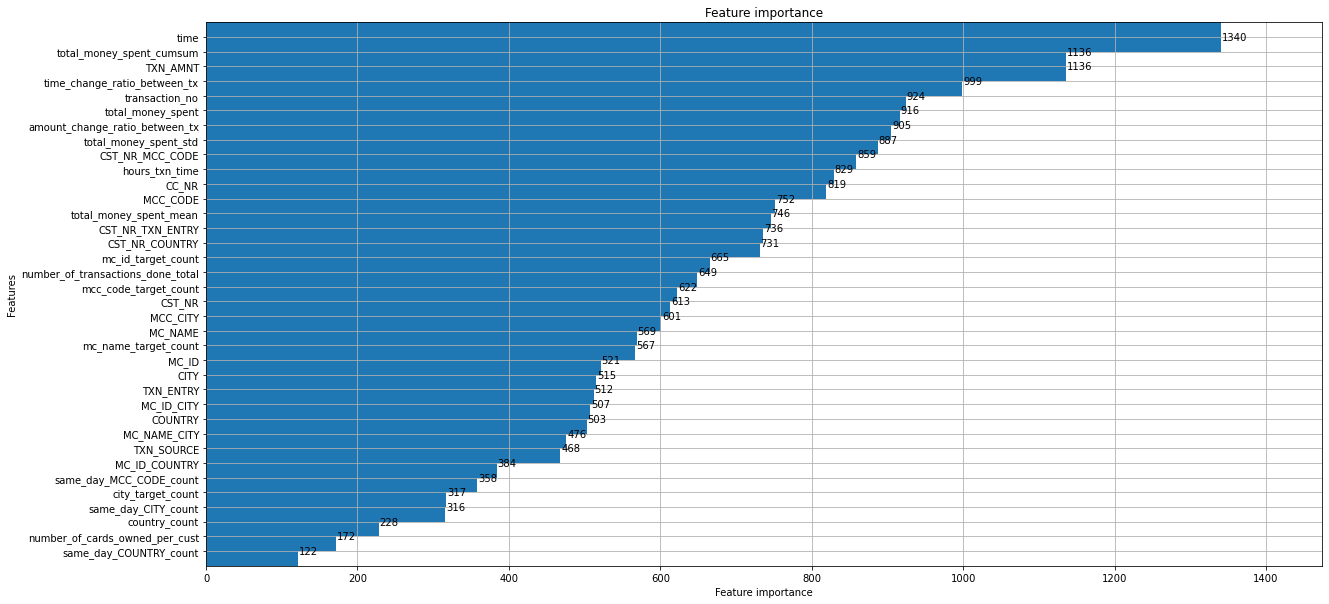

In [152]:
lgbm.plot_importance(booster = clf, height = 2, figsize= (20,10))

In [29]:
test_x

,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,...,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,fav_amount_for_user,fav_time_for_user,user_rank
242162,6.064128e-03,6.064128e-03,0.006064,0.005932,0.002793,0.005851,230.0,0.004071,0.00367,0.027211,...,1,120.000000,240.0,230.0,155.563492,NaN,NaN,10.0,18.0,0.0
166789,1.249910e-11,1.249910e-11,0.006064,0.005932,0.002793,0.005838,130.0,0.003414,0.00367,0.001793,...,5,114.285714,800.0,600.0,69.487923,-0.480000,0.076759,50.0,17.0,0.0
304952,0.000000e+00,0.000000e+00,0.006064,0.005932,0.002793,0.005838,70.0,0.003414,0.00367,0.001793,...,10,103.333333,1550.0,1170.0,120.514769,0.000000,0.060669,50.0,1.0,0.0
304954,0.000000e+00,0.000000e+00,0.006064,0.005932,0.002793,0.005838,150.0,0.003414,0.00367,0.001793,...,11,103.333333,1550.0,1320.0,120.514769,1.142857,0.025641,50.0,1.0,0.0
4662,0.000000e+00,0.000000e+00,0.006064,0.005932,0.002793,0.005838,590.0,0.003414,0.00367,0.000000,...,25,392.058824,13330.0,8010.0,312.145842,0.594595,0.165548,190.0,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213603,0.000000e+00,0.000000e+00,0.006064,0.006014,0.002793,0.005838,50.0,0.003414,0.00367,0.001793,...,23,58.695652,1350.0,1350.0,86.880500,0.666667,0.000000,120.0,20.0,0.0
152624,0.000000e+00,0.000000e+00,0.006064,0.006014,0.010219,0.005838,20.0,0.003414,0.00367,0.004461,...,12,36.666667,550.0,510.0,33.735667,0.000000,0.026836,500.0,4.0,0.0
152625,0.000000e+00,0.000000e+00,0.006064,0.006014,0.010219,0.005838,20.0,0.003414,0.00367,0.004461,...,13,36.666667,550.0,530.0,33.735667,0.000000,-0.002751,500.0,4.0,0.0
152626,0.000000e+00,0.000000e+00,0.006064,0.006014,0.010219,0.005838,0.0,0.003414,0.00367,0.039648,...,14,36.666667,550.0,530.0,33.735667,-1.000000,0.013793,500.0,4.0,0.0


In [28]:
def objective(trial):
    
    param = {
        "n_estimators": 10000,
        "learning_rate" : 0.05,
        "metric": "auc",
        "objective": "binary",
        "boosting_type": "gbdt",
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        "is_unbalance" : True,
        "verbose": 50
    }
    model = lgb.LGBMClassifier(**param)
    skf = StratifiedKFold(n_splits=5)
    auc = 0
    for i, (train_idx, test_idx) in enumerate(skf.split(test_x, test_y)):
        print(f"\n----- FOLD {i} -----")

        X_train = test_x.iloc[train_idx]
        y_train = test_y.iloc[train_idx]
        X_val = test_x.iloc[test_idx]
        y_val = test_y.iloc[test_idx]

        X_train = pd.concat([X, X_train])
        y_train = pd.concat([y, y_train])
    
        model.fit(X_train, y_train, eval_set=[(X_val,y_val)],verbose = 500, early_stopping_rounds = 100)
    
        preds = model.predict_proba(X_val)
    
        auc += roc_auc_score(y_val, preds[:,1])
        print(f"Fold {i} | Eval AUC: {auc/(i+1)}")
    
    return auc / 5

In [22]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, n_jobs = -1)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-11-24 16:15:34,328] A new study created in memory with name: no-name-1ed6f1db-8a72-4966-a593-8a20420b0f0e



----- FOLD 0 -----
----- FOLD 0 -----


----- FOLD 0 -----

----- FOLD 0 -----

----- FOLD 0 -----
----- FOLD 0 -----


----- FOLD 0 -----

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9568956538887394

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9475699615655614

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9474394159444375

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9646216231206464

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9413038148359669

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9489684816173277

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9606747493339194

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9602075172092202

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9519565409416129

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9370395767762081

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9436989665106386

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.960266884139991

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9388298970900265

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9547266464210877

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.94840838

[I 2021-11-24 16:20:25,207] Trial 3 finished with value: 0.9478267493745699 and parameters: {'reg_alpha': 0.2037234550360864, 'reg_lambda': 3.706245291706155, 'num_leaves': 220, 'min_child_samples': 67, 'max_depth': 64, 'colsample_bytree': 0.4529430326478371, 'cat_smooth': 37, 'cat_l2': 13, 'min_data_per_group': 143}. Best is trial 3 with value: 0.9478267493745699.


Fold 4 | Eval AUC: 0.9478267493745699

----- FOLD 0 -----
[500]	valid_0's auc: 0.964681
Fold 0 | Eval AUC: 0.9603094064744876

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9454934722744495

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9442836898457497

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9449020136579293

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9544670729352991

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9475914449422395

----- FOLD 3 -----
Fold 2 | Eval AUC: 0.9502800034101999

----- FOLD 3 -----
Fold 2 | Eval AUC: 0.9424603386152626

----- FOLD 3 -----
Fold 3 | Eval AUC: 0.9429311004005693

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.9517823943223093

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9397958654632892

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.942107020696289

----- FOLD 3 -----
[500]	valid_0's auc: 0.946595


[I 2021-11-24 16:23:25,199] Trial 8 finished with value: 0.9495257670885996 and parameters: {'reg_alpha': 1.980813003817205, 'reg_lambda': 9.538827757825015, 'num_leaves': 72, 'min_child_samples': 48, 'max_depth': 54, 'colsample_bytree': 0.4168333326355175, 'cat_smooth': 81, 'cat_l2': 9, 'min_data_per_group': 140}. Best is trial 8 with value: 0.9495257670885996.


Fold 4 | Eval AUC: 0.9495257670885996

----- FOLD 0 -----
Fold 3 | Eval AUC: 0.9479937960054943

----- FOLD 4 -----
Fold 0 | Eval AUC: 0.9502821469875904

----- FOLD 1 -----


[I 2021-11-24 16:24:02,617] Trial 6 finished with value: 0.9394671886563011 and parameters: {'reg_alpha': 9.835318784895314, 'reg_lambda': 0.7812429060309309, 'num_leaves': 707, 'min_child_samples': 28, 'max_depth': 54, 'colsample_bytree': 0.4160781549241954, 'cat_smooth': 59, 'cat_l2': 11, 'min_data_per_group': 157}. Best is trial 8 with value: 0.9495257670885996.


Fold 4 | Eval AUC: 0.9394671886563011

----- FOLD 0 -----


[I 2021-11-24 16:24:15,480] Trial 0 finished with value: 0.9458715207216908 and parameters: {'reg_alpha': 4.480748672275425, 'reg_lambda': 2.510528424742068, 'num_leaves': 437, 'min_child_samples': 88, 'max_depth': 10, 'colsample_bytree': 0.3336008720907647, 'cat_smooth': 88, 'cat_l2': 12, 'min_data_per_group': 60}. Best is trial 8 with value: 0.9495257670885996.


Fold 4 | Eval AUC: 0.9458715207216908

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9702112558879054

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.948906650429298

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9532216008665031

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.951741566917213

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9506475302820413

----- FOLD 3 -----
[500]	valid_0's auc: 0.954583
Fold 3 | Eval AUC: 0.9522361570407161

----- FOLD 4 -----


[I 2021-11-24 16:25:42,137] Trial 10 finished with value: 0.9524049943970201 and parameters: {'reg_alpha': 0.6137545122255756, 'reg_lambda': 8.963337381255446, 'num_leaves': 7, 'min_child_samples': 27, 'max_depth': 54, 'colsample_bytree': 0.3149571814581228, 'cat_smooth': 51, 'cat_l2': 13, 'min_data_per_group': 87}. Best is trial 10 with value: 0.9524049943970201.


Fold 4 | Eval AUC: 0.9524049943970201

----- FOLD 0 -----
[500]	valid_0's auc: 0.939473


[I 2021-11-24 16:25:53,019] Trial 5 finished with value: 0.9447415737511115 and parameters: {'reg_alpha': 8.203277262792911, 'reg_lambda': 9.98197978432426, 'num_leaves': 647, 'min_child_samples': 89, 'max_depth': 39, 'colsample_bytree': 0.44024742676935946, 'cat_smooth': 13, 'cat_l2': 1, 'min_data_per_group': 172}. Best is trial 10 with value: 0.9524049943970201.


Fold 4 | Eval AUC: 0.9447415737511115

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9464677074534669

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9459177789600409

----- FOLD 3 -----
Fold 3 | Eval AUC: 0.947264678264114

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9380984322896334

----- FOLD 3 -----
Fold 3 | Eval AUC: 0.9507613821360916

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.950517344311091

----- FOLD 4 -----


[I 2021-11-24 16:27:04,660] Trial 9 finished with value: 0.947455606289904 and parameters: {'reg_alpha': 2.964916417009245, 'reg_lambda': 4.332528532458247, 'num_leaves': 54, 'min_child_samples': 90, 'max_depth': 8, 'colsample_bytree': 0.4511131124921267, 'cat_smooth': 72, 'cat_l2': 18, 'min_data_per_group': 158}. Best is trial 10 with value: 0.9524049943970201.


Fold 4 | Eval AUC: 0.947455606289904

----- FOLD 0 -----
Fold 3 | Eval AUC: 0.9460471145733264

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.9433823744766016

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9388458065900759

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9568043952070961

----- FOLD 1 -----


[I 2021-11-24 16:28:00,885] Trial 11 finished with value: 0.9436953812338753 and parameters: {'reg_alpha': 5.369150598927692, 'reg_lambda': 5.82702824132759, 'num_leaves': 380, 'min_child_samples': 47, 'max_depth': 8, 'colsample_bytree': 0.46925314039882904, 'cat_smooth': 17, 'cat_l2': 14, 'min_data_per_group': 80}. Best is trial 10 with value: 0.9524049943970201.


Fold 4 | Eval AUC: 0.9436953812338753

----- FOLD 0 -----


[I 2021-11-24 16:28:03,436] Trial 4 finished with value: 0.947702809439777 and parameters: {'reg_alpha': 5.165410827203686, 'reg_lambda': 7.417278102174678, 'num_leaves': 658, 'min_child_samples': 99, 'max_depth': 29, 'colsample_bytree': 0.3014416289215896, 'cat_smooth': 86, 'cat_l2': 10, 'min_data_per_group': 142}. Best is trial 10 with value: 0.9524049943970201.


Fold 4 | Eval AUC: 0.947702809439777

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9577202687740215

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9679145362703188

----- FOLD 1 -----


[I 2021-11-24 16:28:46,420] Trial 7 finished with value: 0.9431753439117527 and parameters: {'reg_alpha': 2.2002913048312607, 'reg_lambda': 8.102745275654323, 'num_leaves': 804, 'min_child_samples': 89, 'max_depth': 27, 'colsample_bytree': 0.4704119120969964, 'cat_smooth': 46, 'cat_l2': 6, 'min_data_per_group': 162}. Best is trial 10 with value: 0.9524049943970201.


Fold 4 | Eval AUC: 0.9431753439117527

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9506933024740702

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9533707166964871

----- FOLD 1 -----


[I 2021-11-24 16:29:12,971] Trial 1 finished with value: 0.9456103569072255 and parameters: {'reg_alpha': 7.698288423961378, 'reg_lambda': 7.797605739374974, 'num_leaves': 530, 'min_child_samples': 30, 'max_depth': 57, 'colsample_bytree': 0.4009455863892649, 'cat_smooth': 76, 'cat_l2': 14, 'min_data_per_group': 172}. Best is trial 10 with value: 0.9524049943970201.


Fold 4 | Eval AUC: 0.9456103569072255

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.956458241438034

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9752621697072532

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9396452797397231

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9436163226664397

----- FOLD 3 -----
Fold 2 | Eval AUC: 0.950439257377473

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.964641549045507

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9393587852263181

----- FOLD 3 -----
[500]	valid_0's auc: 0.96156
Fold 3 | Eval AUC: 0.9533706210202235

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9535769783062027

----- FOLD 2 -----
Fold 3 | Eval AUC: 0.9470800241491963

----- FOLD 4 -----


[I 2021-11-24 16:31:37,232] Trial 15 finished with value: 0.954258359191761 and parameters: {'reg_alpha': 6.498042070982004, 'reg_lambda': 9.81452956778208, 'num_leaves': 36, 'min_child_samples': 56, 'max_depth': 19, 'colsample_bytree': 0.28575421802188616, 'cat_smooth': 94, 'cat_l2': 5, 'min_data_per_group': 188}. Best is trial 15 with value: 0.954258359191761.


Fold 4 | Eval AUC: 0.954258359191761

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9406997606550649

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.957723286898217

----- FOLD 2 -----


[I 2021-11-24 16:32:02,316] Trial 14 finished with value: 0.9452264959200013 and parameters: {'reg_alpha': 1.8614612630707692, 'reg_lambda': 6.304361161290955, 'num_leaves': 150, 'min_child_samples': 63, 'max_depth': 20, 'colsample_bytree': 0.389980292927779, 'cat_smooth': 55, 'cat_l2': 3, 'min_data_per_group': 185}. Best is trial 15 with value: 0.954258359191761.


Fold 4 | Eval AUC: 0.9452264959200013

----- FOLD 0 -----
Fold 3 | Eval AUC: 0.9455424541232725

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9490190908857973

----- FOLD 3 -----
[500]	valid_0's auc: 0.94615
Fold 3 | Eval AUC: 0.940835445089329

----- FOLD 4 -----


[I 2021-11-24 16:32:51,195] Trial 16 finished with value: 0.9419221258566702 and parameters: {'reg_alpha': 7.170415099175452, 'reg_lambda': 2.16943140588268, 'num_leaves': 177, 'min_child_samples': 16, 'max_depth': 39, 'colsample_bytree': 0.46573103767694946, 'cat_smooth': 35, 'cat_l2': 5, 'min_data_per_group': 124}. Best is trial 15 with value: 0.954258359191761.


Fold 4 | Eval AUC: 0.9419221258566702

----- FOLD 0 -----
[500]	valid_0's auc: 0.916041
Fold 0 | Eval AUC: 0.9615818924698493

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9419333610157903

----- FOLD 4 -----
[500]	valid_0's auc: 0.917184
[500]	valid_0's auc: 0.963451
Fold 0 | Eval AUC: 0.9635766418859373

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9380295914239124

----- FOLD 3 -----
[500]	valid_0's auc: 0.964013
Fold 0 | Eval AUC: 0.9683150062756393

----- FOLD 1 -----
[500]	valid_0's auc: 0.945762


[I 2021-11-24 16:35:45,200] Trial 18 finished with value: 0.9427883622369728 and parameters: {'reg_alpha': 0.09861434987365958, 'reg_lambda': 9.836030696208223, 'num_leaves': 81, 'min_child_samples': 5, 'max_depth': 47, 'colsample_bytree': 0.16264145715207315, 'cat_smooth': 98, 'cat_l2': 7, 'min_data_per_group': 107}. Best is trial 15 with value: 0.954258359191761.


Fold 4 | Eval AUC: 0.9427883622369728

----- FOLD 0 -----


[I 2021-11-24 16:35:48,526] Trial 2 finished with value: 0.9371671848839597 and parameters: {'reg_alpha': 3.1656195314946416, 'reg_lambda': 4.66688816562133, 'num_leaves': 894, 'min_child_samples': 68, 'max_depth': 52, 'colsample_bytree': 0.20050448283463532, 'cat_smooth': 63, 'cat_l2': 3, 'min_data_per_group': 140}. Best is trial 15 with value: 0.954258359191761.


Fold 4 | Eval AUC: 0.9371671848839597

----- FOLD 0 -----
[1000]	valid_0's auc: 0.925576
[1500]	valid_0's auc: 0.927974
Fold 2 | Eval AUC: 0.9480431316187121

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9654240010846277

----- FOLD 1 -----
[500]	valid_0's auc: 0.933367
Fold 0 | Eval AUC: 0.9683739623625984

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9685553499054033

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9448527483374485

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9477867262717465

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9477293427047898

----- FOLD 2 -----
[500]	valid_0's auc: 0.925951
[500]	valid_0's auc: 0.94517


[I 2021-11-24 16:40:25,477] Trial 13 finished with value: 0.9436530084969436 and parameters: {'reg_alpha': 0.6588167816982882, 'reg_lambda': 3.3325718115429286, 'num_leaves': 642, 'min_child_samples': 76, 'max_depth': 61, 'colsample_bytree': 0.2968369958037329, 'cat_smooth': 68, 'cat_l2': 16, 'min_data_per_group': 117}. Best is trial 15 with value: 0.954258359191761.


Fold 4 | Eval AUC: 0.9436530084969436

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9705834290257045

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9549130864037016

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9451568097307649

----- FOLD 2 -----
[500]	valid_0's auc: 0.930577
[500]	valid_0's auc: 0.938612
Fold 3 | Eval AUC: 0.9477938599131134

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9504122855761739

----- FOLD 3 -----
[500]	valid_0's auc: 0.959429
Fold 2 | Eval AUC: 0.948287173843267

----- FOLD 3 -----
[1000]	valid_0's auc: 0.963196
Fold 3 | Eval AUC: 0.9537406895702452

----- FOLD 4 -----


[I 2021-11-24 16:42:27,043] Trial 24 finished with value: 0.9550699419597599 and parameters: {'reg_alpha': 6.344898390156047, 'reg_lambda': 8.383234158116993, 'num_leaves': 5, 'min_child_samples': 35, 'max_depth': 19, 'colsample_bytree': 0.24017828463351115, 'cat_smooth': 48, 'cat_l2': 19, 'min_data_per_group': 94}. Best is trial 24 with value: 0.9550699419597599.


Fold 4 | Eval AUC: 0.9550699419597599

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9554004585416701

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9498101178992728

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9429150376795382

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9675569994433066

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9471515372522225

----- FOLD 3 -----
Fold 3 | Eval AUC: 0.9504866121039905

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9554502307223548

----- FOLD 3 -----
[500]	valid_0's auc: 0.924717
Fold 2 | Eval AUC: 0.9421188539350013

----- FOLD 3 -----
[500]	valid_0's auc: 0.939268
[1000]	valid_0's auc: 0.927011


[I 2021-11-24 16:46:02,194] Trial 12 finished with value: 0.9437734772536569 and parameters: {'reg_alpha': 9.079261415543183, 'reg_lambda': 4.732305270305381, 'num_leaves': 522, 'min_child_samples': 31, 'max_depth': 47, 'colsample_bytree': 0.10065752886005425, 'cat_smooth': 26, 'cat_l2': 13, 'min_data_per_group': 138}. Best is trial 24 with value: 0.9550699419597599.


Fold 4 | Eval AUC: 0.9437734772536569

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9517403237566726

----- FOLD 2 -----
Fold 3 | Eval AUC: 0.9513142073080993

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.9579306304327271

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.953235901262149

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9690972528928541

----- FOLD 1 -----
[500]	valid_0's auc: 0.952722
Fold 2 | Eval AUC: 0.9522106211527116

----- FOLD 3 -----
[500]	valid_0's auc: 0.969753
Fold 3 | Eval AUC: 0.9497696261868238

----- FOLD 4 -----
[500]	valid_0's auc: 0.963864


[I 2021-11-24 16:48:48,020] Trial 22 finished with value: 0.944957950226161 and parameters: {'reg_alpha': 3.9412618433796522, 'reg_lambda': 8.421245824748466, 'num_leaves': 300, 'min_child_samples': 36, 'max_depth': 21, 'colsample_bytree': 0.21288881178394164, 'cat_smooth': 64, 'cat_l2': 18, 'min_data_per_group': 100}. Best is trial 24 with value: 0.9550699419597599.


Fold 4 | Eval AUC: 0.944957950226161

----- FOLD 0 -----
Fold 3 | Eval AUC: 0.947571959610759

----- FOLD 4 -----


[I 2021-11-24 16:49:57,378] Trial 23 finished with value: 0.9596666659048342 and parameters: {'reg_alpha': 6.434206846036138, 'reg_lambda': 8.38224123586474, 'num_leaves': 310, 'min_child_samples': 35, 'max_depth': 20, 'colsample_bytree': 0.24323782372695293, 'cat_smooth': 26, 'cat_l2': 17, 'min_data_per_group': 98}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9596666659048342

----- FOLD 0 -----
[500]	valid_0's auc: 0.930174
Fold 0 | Eval AUC: 0.9548179653781919

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9549190528580099

----- FOLD 4 -----
[1000]	valid_0's auc: 0.956132
Fold 1 | Eval AUC: 0.949856871057887

----- FOLD 2 -----


[I 2021-11-24 16:51:56,234] Trial 19 finished with value: 0.9395239529895235 and parameters: {'reg_alpha': 6.583957962542275, 'reg_lambda': 6.432598222129316, 'num_leaves': 993, 'min_child_samples': 13, 'max_depth': 40, 'colsample_bytree': 0.20265485968040742, 'cat_smooth': 64, 'cat_l2': 6, 'min_data_per_group': 199}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9395239529895235

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9675319379708012

----- FOLD 1 -----


[I 2021-11-24 16:52:51,518] Trial 21 finished with value: 0.9517969589712717 and parameters: {'reg_alpha': 0.17557932301082513, 'reg_lambda': 8.866443228705975, 'num_leaves': 294, 'min_child_samples': 10, 'max_depth': 47, 'colsample_bytree': 0.19203810979332114, 'cat_smooth': 96, 'cat_l2': 18, 'min_data_per_group': 104}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9517969589712717


[I 2021-11-24 16:52:55,582] Trial 20 finished with value: 0.9420670001433142 and parameters: {'reg_alpha': 6.934894198168387, 'reg_lambda': 9.235584498030315, 'num_leaves': 974, 'min_child_samples': 6, 'max_depth': 41, 'colsample_bytree': 0.19878827389817497, 'cat_smooth': 100, 'cat_l2': 7, 'min_data_per_group': 107}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9420670001433142
Fold 1 | Eval AUC: 0.9496306426039851

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9519886918772551

----- FOLD 3 -----


[I 2021-11-24 16:53:23,043] Trial 25 finished with value: 0.9578334606742315 and parameters: {'reg_alpha': 6.294859686431245, 'reg_lambda': 8.497082530231033, 'num_leaves': 291, 'min_child_samples': 39, 'max_depth': 16, 'colsample_bytree': 0.24130155894219973, 'cat_smooth': 32, 'cat_l2': 20, 'min_data_per_group': 195}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9578334606742315
Fold 2 | Eval AUC: 0.9452681640982572

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9692564548698344

----- FOLD 1 -----
[500]	valid_0's auc: 0.936641
Fold 2 | Eval AUC: 0.9479362420090286

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9478183257278949

----- FOLD 2 -----
Fold 3 | Eval AUC: 0.9559204552252307

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.9492025213858065

----- FOLD 4 -----
[500]	valid_0's auc: 0.941593


[I 2021-11-24 16:55:57,486] Trial 27 finished with value: 0.9456747922195884 and parameters: {'reg_alpha': 6.410200486154676, 'reg_lambda': 6.465280741612652, 'num_leaves': 272, 'min_child_samples': 58, 'max_depth': 18, 'colsample_bytree': 0.2586970554896953, 'cat_smooth': 97, 'cat_l2': 20, 'min_data_per_group': 195}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9456747922195884
Fold 2 | Eval AUC: 0.9493514983339949

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9555867661637836

----- FOLD 2 -----


[I 2021-11-24 16:56:28,917] Trial 26 finished with value: 0.9580958106380935 and parameters: {'reg_alpha': 6.435069923182601, 'reg_lambda': 6.727640485921623, 'num_leaves': 297, 'min_child_samples': 41, 'max_depth': 17, 'colsample_bytree': 0.23535454018657473, 'cat_smooth': 100, 'cat_l2': 20, 'min_data_per_group': 195}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9580958106380935
Fold 2 | Eval AUC: 0.9553671605236006

----- FOLD 3 -----
Fold 3 | Eval AUC: 0.9532879173531572

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.9521568869021428

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.9567337832217873

----- FOLD 4 -----


[I 2021-11-24 16:58:11,503] Trial 28 finished with value: 0.9554253506478914 and parameters: {'reg_alpha': 6.12132928041264, 'reg_lambda': 6.9074825757709455, 'num_leaves': 299, 'min_child_samples': 41, 'max_depth': 17, 'colsample_bytree': 0.2376588373645863, 'cat_smooth': 41, 'cat_l2': 20, 'min_data_per_group': 200}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9554253506478914
[500]	valid_0's auc: 0.965879


[I 2021-11-24 16:58:44,334] Trial 29 finished with value: 0.9586933497573901 and parameters: {'reg_alpha': 6.291262694752384, 'reg_lambda': 8.873432913375545, 'num_leaves': 264, 'min_child_samples': 42, 'max_depth': 15, 'colsample_bytree': 0.25640430248174423, 'cat_smooth': 41, 'cat_l2': 20, 'min_data_per_group': 68}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9586933497573901
[500]	valid_0's auc: 0.96105


[I 2021-11-24 16:59:18,471] Trial 17 finished with value: 0.9544205863229575 and parameters: {'reg_alpha': 0.9569001457651227, 'reg_lambda': 6.270944970135233, 'num_leaves': 972, 'min_child_samples': 6, 'max_depth': 42, 'colsample_bytree': 0.10945620209368906, 'cat_smooth': 33, 'cat_l2': 20, 'min_data_per_group': 101}. Best is trial 23 with value: 0.9596666659048342.


Fold 4 | Eval AUC: 0.9544205863229575
Number of finished trials: 30
Best trial: {'reg_alpha': 6.434206846036138, 'reg_lambda': 8.38224123586474, 'num_leaves': 310, 'min_child_samples': 35, 'max_depth': 20, 'colsample_bytree': 0.24323782372695293, 'cat_smooth': 26, 'cat_l2': 17, 'min_data_per_group': 98}


In [23]:
BEST_PARAMS = {'reg_alpha': 6.434206846036138, 'reg_lambda': 8.38224123586474, 'num_leaves': 310, 'min_child_samples': 35,
               'max_depth': 20, 'colsample_bytree': 0.24323782372695293, 'cat_smooth': 26, 
               'cat_l2': 17, 'min_data_per_group': 98}

In [17]:
test_small_transformed

,target,CST_NR,CC_NR,DAY_OF_MONTH,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,...,number_of_cards_owned_per_cust,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,user_rank
242162,NaN,6.064128e-03,6.064128e-03,0.006064,0.002793,0.005851,230.0,0.004071,0.00367,0.027211,...,1,2,1,120.000000,240.0,230.0,155.563492,NaN,NaN,0.0
166789,NaN,1.249910e-11,1.249910e-11,0.006064,0.002793,0.005838,130.0,0.003414,0.00367,0.001793,...,1,7,5,114.285714,800.0,600.0,69.487923,-0.480000,0.076759,0.0
304952,NaN,0.000000e+00,0.000000e+00,0.006064,0.002793,0.005838,70.0,0.003414,0.00367,0.001793,...,1,15,10,103.333333,1550.0,1170.0,120.514769,0.000000,0.060669,0.0
304954,NaN,0.000000e+00,0.000000e+00,0.006064,0.002793,0.005838,150.0,0.003414,0.00367,0.001793,...,1,15,11,103.333333,1550.0,1320.0,120.514769,1.142857,0.025641,0.0
4662,NaN,0.000000e+00,0.000000e+00,0.006064,0.002793,0.005838,590.0,0.003414,0.00367,0.000000,...,2,34,25,392.058824,13330.0,8010.0,312.145842,0.594595,0.165548,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213603,NaN,0.000000e+00,0.000000e+00,0.006064,0.002793,0.005838,50.0,0.003414,0.00367,0.001793,...,1,23,23,58.695652,1350.0,1350.0,86.880500,0.666667,0.000000,0.0
152624,NaN,0.000000e+00,0.000000e+00,0.006064,0.010219,0.005838,20.0,0.003414,0.00367,0.004461,...,2,15,12,36.666667,550.0,510.0,33.735667,0.000000,0.026836,0.0
152625,NaN,0.000000e+00,0.000000e+00,0.006064,0.010219,0.005838,20.0,0.003414,0.00367,0.004461,...,2,15,13,36.666667,550.0,530.0,33.735667,0.000000,-0.002751,0.0
152626,NaN,0.000000e+00,0.000000e+00,0.006064,0.010219,0.005838,0.0,0.003414,0.00367,0.039648,...,2,15,14,36.666667,550.0,530.0,33.735667,-1.000000,0.013793,0.0


In [41]:
BEST_PARAMS = {'reg_alpha': 0.12665618126289094, 'reg_lambda': 0.6757060051258615, 'colsample_bytree': 0.3, 
               'subsample': 0.7, 'learning_rate': 0.017, 
               'max_depth': 100, 'num_leaves': 546, 'min_child_samples': 76, 'min_data_per_groups': 40}
#94.516

In [20]:
test_small_transformed.to_csv("marchontest.csv", index = False)

In [ ]:
import lightgbm as lgb
dtrain = lgb.Dataset(X, label=y)

# We will track how many training rounds we needed for our best score.
# We will use that number of rounds later.
best_score = 0.90
training_rounds = 10000

# Declare how we evaluate how good a set of hyperparameters are, i.e.
# declare an objective function.
def objective(trial):
    # Specify a search space using distributions across plausible values of hyperparameters.
    param = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        "is_unbalance" : True,
        "verbose" :2
    }
    
    # Run LightGBM for the hyperparameter values
    lgbcv = lgb.cv(param,
                   dtrain,
                   folds=skf,
                   verbose_eval=False,                   
                   early_stopping_rounds=250,                   
                   num_boost_round=10000,                    
                   callbacks=[lgb.reset_parameter(learning_rate = [0.005]*200 + [0.001]*9800) ]
                  )
    
    cv_score = roc_auc_score(test_small_transformed, 
                             lgb.predict_proba(test_small_transformed.drop(["ID", "target"], 1))[:,1])
    if cv_score<best_score:
        training_rounds = len( list(lgbcv.values())[0] )
    
    # Return metric of interest
    return cv_score

# Suppress information only outputs - otherwise optuna is 
# quite verbose, which can be nice, but takes up a lot of space
optuna.logging.set_verbosity(optuna.logging.WARNING) 

# We search for another 4 hours (3600 s are an hours, so timeout=14400).
# We could instead do e.g. n_trials=1000, to try 1000 hyperparameters chosen 
# by optuna or set neither timeout or n_trials so that we keep going until 
# the user interrupts ("Cancel run").
study = optuna.create_study(direction='maximize')  
study.enqueue_trial(tmp_best_params)
study.optimize(objective, timeout=14400) 

In [24]:
impo
model = lgbm

,target,CST_NR,CC_NR,DAY_OF_MONTH,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,...,number_of_cards_owned_per_cust,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,user_rank
351669,0.0,00004c222f3aaeb05ae9ea63a1aade6b3928fcd9f9994f...,cd176b2f45d8f188877cd7f8300e63804ae287c8eea085...,11.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,490.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,1110f8a082baa9ebf2acc528164113cd1cfa3facee4b4c...,...,1,11,4,286.363636,3150.0,590.0,234.361803,15.333333,0.315271,0.0
141372,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,...,1,30,13,166.000000,4980.0,1770.0,134.513171,1.000000,0.019157,0.0
141373,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,...,1,30,14,166.000000,4980.0,1820.0,134.513171,-0.166667,0.071429,0.0
141376,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,...,1,30,15,166.000000,4980.0,1880.0,134.513171,0.200000,-0.038596,0.0
141377,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,...,1,30,16,166.000000,4980.0,1930.0,134.513171,-0.166667,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357793,0.0,fff74c7190a28e6d49c5dd7f2bc097d92aecb28fed790e...,63cdfcdcee36cae183ae4efad5c53868463fc850f997df...,20.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,b05949fdd838ee81c6531153fec635819d979a42152f62...,...,2,18,17,23.888889,430.0,410.0,6.076850,-0.333333,0.054622,0.0
357797,0.0,fff74c7190a28e6d49c5dd7f2bc097d92aecb28fed790e...,63cdfcdcee36cae183ae4efad5c53868463fc850f997df...,20.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,b05949fdd838ee81c6531153fec635819d979a42152f62...,...,2,18,18,23.888889,430.0,430.0,6.076850,0.000000,0.000000,0.0
455940,0.0,fff801bc5262a80674018bafb4d81dfef33f02973ecb56...,90fd66a9f8085cd7052a12df0467f721fde43a439a2cb4...,20.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,1000.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,...,1,9,9,383.333333,3450.0,3450.0,257.633461,9.000000,0.167053,0.0
392325,0.0,fffc0325496dfe7dccf131b0c19db52fcdbb01dbdcc691...,44f746b47ce8980d14dde1b782e899fe16109506e381f6...,20.0,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,15fdddb9a21629e4a06038cc97612b6e1174842998c6c8...,d2e685c2ad187427e826956fc5be5b0f36eb758fb4a354...,b01c6c2f6ef461bec0f46def169481de9b5953833067b3...,...,1,15,14,70.666667,1060.0,1050.0,105.996406,0.666667,0.092342,0.0


In [161]:
def create(hyperparams):
    """Create LGBM Classifier for a given set of hyper-parameters."""
    model = LGBMClassifier(**hyperparams)
    return model

def fit(model, X, y):
    """Simple training of a given model."""
    model.fit(X, y)
    return model

def fit_with_stop(model, X, y, X_val, y_val, esr):
    """Advanced training with early stopping."""
    model.fit(X, y,
              eval_set=(X_val, y_val),
              early_stopping_rounds=esr, 
              verbose=200)
    return model

def evaluate(model, X, y):
    """Compute AUC for a given model."""
    yp = model.predict_proba(X)[:, 1]
    auc_score = roc_auc_score(y, yp)
    return auc_score

def kfold_evaluation(X, y, k,test_small_transformed, hyperparams, esr=100):
    """Run a KFlod evaluation."""
    scores = []
    
    print(f"\n------ {k}-fold evaluation -----")
    print(hyperparams)
    
    kf = StratifiedKFold(k)
    for i, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        print(f"\n----- FOLD {i} -----")
        
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[test_idx]
        y_val = y.iloc[test_idx]
        
        model = create(hyperparams)
        model = fit_with_stop(model, X_train, y_train, X_val, y_val, esr)
        train_score = evaluate(model, X_train, y_train)
        val_score = evaluate(model, X_val, y_val)
        test_score = evaluate(model, test_small_transformed.drop(["ID", "target", "DAY_OF_MONTH"],1),
                              test_small_transformed.target)
        scores.append((train_score, val_score, test_score))
        
        print(f"Fold {i} | Eval AUC: {test_score}")
        
        
    scores = pd.DataFrame(scores, columns=['train score', 'validation score', "test_score"])
    
    return scores

def kfold_prediction(X, y, X_test, k, hyperparams, esr=100):
    """Make predictions with a bagged model based on KFold."""
    yp = np.zeros(len(X_test))
    
    print(f"\n------ {k}-fold evaluation -----")
    print(hyperparams)
    
    kf = StratifiedKFold(k)
    for i, (train_idx, test_idx) in enumerate(kf.split(X,y)):
        print(f"\n----- FOLD {i} -----")
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[test_idx]
        y_val = y.iloc[test_idx]
        
        model = create(hyperparams)
        model = fit_with_stop(model, X_train, y_train, X_val, y_val, esr)
        yp += model.predict_proba(X_test)[:, 1] / k
    
    return yp

In [162]:
# Constant
K = 5
#X_TEST =  test_df.drop(["target", "CST_NR", "CC_NR"], 1)
BEST_PARAMS = {"objective": "binary", "boosting_type": "gbdt",
 'metric': 'auc', "learning_rate" : 0.05, "n_estimators" : 10000
}

In [163]:
# Objective function
def objective(trial):
    # Search spaces
    hyperparams = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        "is_unbalance" : True,
        "verbose" :2
    }
    
    # Add BEST_PARAMS
    hyperparams.update(BEST_PARAMS)
    
    # Evaluation
    scores = kfold_evaluation(X, Y, K, test, hyperparams, 100)
    
    return scores['test_score'].mean()

In [156]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm#9671 EN SON
# Train and score baseline model
baseline = lgbm.LGBMClassifier(objective = "binary", boosting_type = "gbdt", metric = "auc", is_unbalance = True,
                                       learning_rate = 0.005,
                                       random_state=0)
baseline_score = cross_val_score(
            baseline, X, y, cv=5, scoring="roc_auc")

baseline_score = baseline_score.mean()

print(f" Roc auc Score: {baseline_score:.4}")

 Roc auc Score: 0.9855


In [215]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm#9671 EN SON
# Train and score baseline model
baseline = lgbm.LGBMClassifier(objective = "binary", boosting_type = "gbdt", metric = "auc", is_unbalance = True,
                                       learning_rate = 0.005,
                                       random_state=0)
baseline_score = cross_val_score(
            baseline, X, y, cv=5, scoring="roc_auc")

baseline_score = baseline_score.mean()

print(f" Roc auc Score: {baseline_score:.4}")

 Roc auc Score: 0.9867


In [140]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
X = train.drop(["target"],1 )
y = train.target
for i in cg.columns:
    if i in ["target", "ID", "CST_NR", "CC_NR", "TXN_AMNT", "MCC_CODE", "CITY", "COUNTRY"]:
        continue
    else:
        # Train and score baseline model
        baseline = lgbm.LGBMClassifier(objective = "binary", boosting_type = "gbdt", metric = "auc", is_unbalance = True,
                                       learning_rate = 0.005,
                                       random_state=0)
        baseline_score = cross_val_score(
            baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")

        baseline_score = baseline_score.mean()

        print(f"without {i} Roc auc Score: {baseline_score:.4}")

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = cg.drop(["target"],1 )
C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without MC_NAME Roc auc Score: 0.9673


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without MC_ID Roc auc Score: 0.9673


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without hours_txn_time Roc auc Score: 0.9672


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without same_day_MCC_CODE_count Roc auc Score: 0.9669


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without same_day_MC_NAME_count Roc auc Score: 0.9663


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without same_day_MC_ID_count Roc auc Score: 0.9671


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without same_day_countries_count Roc auc Score: 0.967


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without country_count Roc auc Score: 0.9672


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without city_target_count Roc auc Score: 0.9669


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without mc_name_target_count Roc auc Score: 0.9671


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


without mc_id_target_count Roc auc Score: 0.9676


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_7668/4206599535.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


KeyboardInterrupt: 

In [193]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
#X = cg.drop(["target"],1 )
#y = cg.target
saglamlar = ["target", "ID", "CST_NR", "CC_NR", "TXN_AMNT", "MCC_CODE", "CITY", "COUNTRY"]
old_score = 0.9867
for i in X.columns:
    if i in saglamlar:
        continue
    else:
        # Train and score baseline model
        baseline = lgbm.LGBMClassifier(objective = "binary", boosting_type = "gbdt", metric = "auc", is_unbalance = True,
                                       learning_rate = 0.005,
                                       random_state=0)
        baseline_score = cross_val_score(
            baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")

        baseline_score = baseline_score.mean()
        if baseline_score >= old_score:
            X.drop([i],1, inplace = True)
            old_score = baseline_score
            print(f" {i} atıldı!.")
        else:
            saglamlar.append(i)
            print(f" {i} saglammis eklendi.")

        print(f"without {i} Roc auc Score: {baseline_score:.4}")

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_SOURCE saglammis eklendi.
without TXN_SOURCE Roc auc Score: 0.9865


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")
C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop([i],1, inplace = True)
C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 MC_NAME atıldı!.
without MC_NAME Roc auc Score: 0.9867
 same_day_MCC_CODE_count saglammis eklendi.
without same_day_MCC_CODE_count Roc auc Score: 0.9867


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 same_day_MC_NAME_count saglammis eklendi.
without same_day_MC_NAME_count Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 same_day_city_count saglammis eklendi.
without same_day_city_count Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 same_day_countries_count saglammis eklendi.
without same_day_countries_count Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 country_count saglammis eklendi.
without country_count Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 mc_name_target_count saglammis eklendi.
without mc_name_target_count Roc auc Score: 0.9865


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 mc_id_target_count saglammis eklendi.
without mc_id_target_count Roc auc Score: 0.9864


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 mcc_code_target_count saglammis eklendi.
without mcc_code_target_count Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 customers_last_transaction saglammis eklendi.
without customers_last_transaction Roc auc Score: 0.9865


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 number_of_cards_owned_per_cust saglammis eklendi.
without number_of_cards_owned_per_cust Roc auc Score: 0.9865


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 number_of_transactions_done_total saglammis eklendi.
without number_of_transactions_done_total Roc auc Score: 0.9864


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 transaction_no saglammis eklendi.
without transaction_no Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 total_money_spent saglammis eklendi.
without total_money_spent Roc auc Score: 0.9861


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 total_money_spent_cumsum saglammis eklendi.
without total_money_spent_cumsum Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 total_money_spent_std saglammis eklendi.
without total_money_spent_std Roc auc Score: 0.9861


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 time_change_ratio_between_tx saglammis eklendi.
without time_change_ratio_between_tx Roc auc Score: 0.9857


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CST_NR_TXN_SOURCE saglammis eklendi.
without CST_NR_TXN_SOURCE Roc auc Score: 0.9862


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CST_NR_TXN_ENTRY saglammis eklendi.
without CST_NR_TXN_ENTRY Roc auc Score: 0.9861


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CST_NR_COUNTRY saglammis eklendi.
without CST_NR_COUNTRY Roc auc Score: 0.986


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CC_NR_TXN_SOURCE saglammis eklendi.
without CC_NR_TXN_SOURCE Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CC_NR_TXN_ENTRY saglammis eklendi.
without CC_NR_TXN_ENTRY Roc auc Score: 0.9861


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CC_NR_CITY saglammis eklendi.
without CC_NR_CITY Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CC_NR_COUNTRY saglammis eklendi.
without CC_NR_COUNTRY Roc auc Score: 0.9866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CC_NR_MC_NAME saglammis eklendi.
without CC_NR_MC_NAME Roc auc Score: 0.9865


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CC_NR_MC_ID saglammis eklendi.
without CC_NR_MC_ID Roc auc Score: 0.986


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_SOURCE_TXN_ENTRY saglammis eklendi.
without TXN_SOURCE_TXN_ENTRY Roc auc Score: 0.9862


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_SOURCE_CITY saglammis eklendi.
without TXN_SOURCE_CITY Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_SOURCE_COUNTRY saglammis eklendi.
without TXN_SOURCE_COUNTRY Roc auc Score: 0.9864


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_SOURCE_MC_ID saglammis eklendi.
without TXN_SOURCE_MC_ID Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_SOURCE_MCC_CODE saglammis eklendi.
without TXN_SOURCE_MCC_CODE Roc auc Score: 0.9864


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_ENTRY_CITY saglammis eklendi.
without TXN_ENTRY_CITY Roc auc Score: 0.9864


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_ENTRY_COUNTRY saglammis eklendi.
without TXN_ENTRY_COUNTRY Roc auc Score: 0.9861


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_ENTRY_MC_NAME saglammis eklendi.
without TXN_ENTRY_MC_NAME Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_ENTRY_MC_ID saglammis eklendi.
without TXN_ENTRY_MC_ID Roc auc Score: 0.9862


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 TXN_ENTRY_MCC_CODE saglammis eklendi.
without TXN_ENTRY_MCC_CODE Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CITY_MC_NAME saglammis eklendi.
without CITY_MC_NAME Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


 CITY_MC_ID saglammis eklendi.
without CITY_MC_ID Roc auc Score: 0.9863


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/585998014.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  baseline, X.drop([i],1) , y, cv=5, scoring="roc_auc")


KeyboardInterrupt: 

In [195]:
X.columns

Index(['CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_AMNT', 'CITY', 'COUNTRY',
       'MCC_CODE', 'ID', 'same_day_MCC_CODE_count', 'same_day_MC_NAME_count',
       'same_day_city_count', 'same_day_countries_count', 'country_count',
       'mc_name_target_count', 'mc_id_target_count', 'mcc_code_target_count',
       'customers_last_transaction', 'number_of_cards_owned_per_cust',
       'number_of_transactions_done_total', 'transaction_no',
       'total_money_spent', 'total_money_spent_cumsum',
       'total_money_spent_std', 'time_change_ratio_between_tx',
       'CST_NR_TXN_SOURCE', 'CST_NR_TXN_ENTRY', 'CST_NR_COUNTRY',
       'CC_NR_TXN_SOURCE', 'CC_NR_TXN_ENTRY', 'CC_NR_CITY', 'CC_NR_COUNTRY',
       'CC_NR_MC_NAME', 'CC_NR_MC_ID', 'TXN_SOURCE_TXN_ENTRY',
       'TXN_SOURCE_CITY', 'TXN_SOURCE_COUNTRY', 'TXN_SOURCE_MC_ID',
       'TXN_SOURCE_MCC_CODE', 'TXN_ENTRY_CITY', 'TXN_ENTRY_COUNTRY',
       'TXN_ENTRY_MC_NAME', 'TXN_ENTRY_MC_ID', 'TXN_ENTRY_MCC_CODE',
       'CITY_MC_NAME', 'CITY_MC_I

In [202]:
test_transformed.columns

Index(['target', 'CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_ENTRY', 'TXN_AMNT',
       'CITY', 'COUNTRY', 'MC_NAME', 'MC_ID', 'MCC_CODE', 'ID',
       'hours_txn_time', 'time', 'same_day_MCC_CODE_count',
       'same_day_MC_NAME_count', 'same_day_MC_ID_count', 'same_day_city_count',
       'same_day_countries_count', 'country_count', 'city_target_count',
       'mc_name_target_count', 'mc_id_target_count', 'mcc_code_target_count',
       'customers_last_transaction', 'number_of_cards_owned_per_cust',
       'number_of_transactions_done_total', 'transaction_no',
       'total_money_spent_mean', 'total_money_spent',
       'total_money_spent_cumsum', 'total_money_spent_std',
       'amount_change_ratio_between_tx', 'time_change_ratio_between_tx',
       'user_rank', 'CST_NR_CC_NR', 'CST_NR_TXN_SOURCE', 'CST_NR_TXN_ENTRY',
       'CST_NR_CITY', 'CST_NR_COUNTRY', 'CST_NR_MC_NAME', 'CST_NR_MC_ID',
       'CST_NR_MCC_CODE', 'CC_NR_TXN_SOURCE', 'CC_NR_TXN_ENTRY', 'CC_NR_CITY',
       'CC_NR_COUNTR

In [216]:
test_transformed.columns.difference(X.columns)

Index(['ID', 'target'], dtype='object')

In [203]:
test_transformed.drop(['CC_NR_MCC_CODE', 'CITY_COUNTRY', 'COUNTRY_MC_ID', 'COUNTRY_MC_NAME',
       'CST_NR_CC_NR', 'CST_NR_CITY', 'CST_NR_MCC_CODE', 'CST_NR_MC_ID',
       'CST_NR_MC_NAME', 'MC_ID', 'MC_NAME', 'TXN_ENTRY', 'TXN_SOURCE_MC_NAME',
       'amount_change_ratio_between_tx', 'city_target_count', 'hours_txn_time',
       'same_day_MC_ID_count','time', 'total_money_spent_mean',
       'user_rank'],1, inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/2137211329.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_transformed.drop(['CC_NR_MCC_CODE', 'CITY_COUNTRY', 'COUNTRY_MC_ID', 'COUNTRY_MC_NAME',


In [207]:
cg.loc[cg.target.isnull()].ID

242162    242162.0
166789    166789.0
304952    304952.0
304954    304954.0
4662        4662.0
            ...   
213603    213603.0
152624    152624.0
152625    152625.0
152626    152626.0
152629    152629.0
Name: ID, Length: 326232, dtype: float64

In [214]:
X.drop(["ID"], 1, inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/2067963229.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(["ID"], 1, inplace = True)


In [212]:
X.isna().any()

CST_NR                               False
CC_NR                                False
TXN_SOURCE                           False
TXN_AMNT                             False
CITY                                 False
COUNTRY                              False
MCC_CODE                             False
ID                                    True
same_day_MCC_CODE_count              False
same_day_MC_NAME_count               False
same_day_city_count                  False
same_day_countries_count             False
country_count                        False
mc_name_target_count                 False
mc_id_target_count                   False
mcc_code_target_count                False
customers_last_transaction           False
number_of_cards_owned_per_cust       False
number_of_transactions_done_total    False
transaction_no                       False
total_money_spent                    False
total_money_spent_cumsum             False
total_money_spent_std                 True
time_change

In [47]:
X = train_small.drop(["ID","target", "DAY_OF_MONTH"], 1)
Y = train_small.target

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_12784/1338522819.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train_small.drop(["ID","target", "DAY_OF_MONTH"], 1)


In [158]:
Y = y

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 7, n_jobs = -1)

[I 2021-11-27 01:03:03,214] A new study created in memory with name: no-name-8debbe9f-2da0-449d-9b18-d7a43539b8c3



------ 5-fold evaluation -----
{'reg_alpha': 7.247298340534098, 'reg_lambda': 4.235640960251763, 'num_leaves': 230, 'min_child_samples': 43, 'max_depth': 51, 'colsample_bytree': 0.4471180080167608, 'cat_smooth': 25, 'cat_l2': 2, 'min_data_per_group': 199, 'is_unbalance': True, 'verbose': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'metric': 'auc', 'learning_rate': 0.05, 'n_estimators': 10000}

------ 5-fold evaluation -----
------ 5-fold evaluation -----
{'reg_alpha': 3.360001074061378, 'reg_lambda': 0.16484725162491154, 'num_leaves': 298, 'min_child_samples': 45, 'max_depth': 55, 'colsample_bytree': 0.18205274548504458, 'cat_smooth': 44, 'cat_l2': 5, 'min_data_per_group': 159, 'is_unbalance': True, 'verbose': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'metric': 'auc', 'learning_rate': 0.05, 'n_estimators': 10000}


------ 5-fold evaluation -----
{'reg_alpha': 7.893929242739128, 'reg_lambda': 1.3869329452532113, 'num_leaves': 455, 'min_child_samples': 47, 'max_depth': 5

[W 2021-11-27 01:03:33,216] Trial 1 failed because of the following error: KeyError("['DAY_OF_MONTH'] not found in axis")
Traceback (most recent call last):
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/964272778.py", line 22, in objective
    scores = kfold_evaluation(X, Y, K, test, hyperparams, 100)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/3306221382.py", line 45, in kfold_evaluation
    test_score = evaluate(model, test_small_transformed.drop(["ID", "target", "DAY_OF_MONTH"],1),
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\core\frame.py", line 4906, in drop
    return super().drop(
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pa

[200]	valid_0's auc: 0.979277


[W 2021-11-27 01:04:03,353] Trial 5 failed because of the following error: KeyError("['DAY_OF_MONTH'] not found in axis")
Traceback (most recent call last):
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/964272778.py", line 22, in objective
    scores = kfold_evaluation(X, Y, K, test, hyperparams, 100)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/3306221382.py", line 45, in kfold_evaluation
    test_score = evaluate(model, test_small_transformed.drop(["ID", "target", "DAY_OF_MONTH"],1),
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\core\frame.py", line 4906, in drop
    return super().drop(
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pa

[200]	valid_0's auc: 0.982337
[200]	valid_0's auc: 0.980667
[400]	valid_0's auc: 0.981035


[W 2021-11-27 01:04:18,740] Trial 6 failed because of the following error: KeyError("['DAY_OF_MONTH'] not found in axis")
Traceback (most recent call last):
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/964272778.py", line 22, in objective
    scores = kfold_evaluation(X, Y, K, test, hyperparams, 100)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/3306221382.py", line 45, in kfold_evaluation
    test_score = evaluate(model, test_small_transformed.drop(["ID", "target", "DAY_OF_MONTH"],1),
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\core\frame.py", line 4906, in drop
    return super().drop(
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pa

[200]	valid_0's auc: 0.976745
[200]	valid_0's auc: 0.976021


[W 2021-11-27 01:04:35,467] Trial 3 failed because of the following error: KeyError("['DAY_OF_MONTH'] not found in axis")
Traceback (most recent call last):
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/964272778.py", line 22, in objective
    scores = kfold_evaluation(X, Y, K, test, hyperparams, 100)
  File "C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_15532/3306221382.py", line 45, in kfold_evaluation
    test_score = evaluate(model, test_small_transformed.drop(["ID", "target", "DAY_OF_MONTH"],1),
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pandas\core\frame.py", line 4906, in drop
    return super().drop(
  File "C:\Users\analyticahouse\Anaconda3\lib\site-packages\pa

[600]	valid_0's auc: 0.982423
[400]	valid_0's auc: 0.978017
[800]	valid_0's auc: 0.983155
[1000]	valid_0's auc: 0.983734
[600]	valid_0's auc: 0.978401


In [226]:
test_transformed.columns

Index(['target', 'CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_AMNT', 'CITY',
       'COUNTRY', 'MCC_CODE', 'ID', 'same_day_MCC_CODE_count',
       'same_day_MC_NAME_count', 'same_day_city_count',
       'same_day_countries_count', 'country_count', 'mc_name_target_count',
       'mc_id_target_count', 'mcc_code_target_count',
       'customers_last_transaction', 'number_of_cards_owned_per_cust',
       'number_of_transactions_done_total', 'transaction_no',
       'total_money_spent', 'total_money_spent_cumsum',
       'total_money_spent_std', 'time_change_ratio_between_tx',
       'CST_NR_TXN_SOURCE', 'CST_NR_TXN_ENTRY', 'CST_NR_COUNTRY',
       'CC_NR_TXN_SOURCE', 'CC_NR_TXN_ENTRY', 'CC_NR_CITY', 'CC_NR_COUNTRY',
       'CC_NR_MC_NAME', 'CC_NR_MC_ID', 'TXN_SOURCE_TXN_ENTRY',
       'TXN_SOURCE_CITY', 'TXN_SOURCE_COUNTRY', 'TXN_SOURCE_MC_ID',
       'TXN_SOURCE_MCC_CODE', 'TXN_ENTRY_CITY', 'TXN_ENTRY_COUNTRY',
       'TXN_ENTRY_MC_NAME', 'TXN_ENTRY_MC_ID', 'TXN_ENTRY_MCC_CODE',
       'CITY_MC_

In [229]:
test_transformed.customers_last_transaction.max()

9.0

In [234]:
BEST_PARAMS.update(study.best_params)

In [235]:
BEST_PARAMS.update({"learning_rate": 0.005})

In [236]:
BEST_PARAMS  #9852 05.07 saat

{'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'learning_rate': 0.005,
 'n_estimators': 10000,
 'reg_alpha': 8.89323089675137,
 'reg_lambda': 9.231666425063862,
 'num_leaves': 846,
 'min_child_samples': 69,
 'max_depth': 22,
 'colsample_bytree': 0.3014847073159448,
 'cat_smooth': 20,
 'cat_l2': 7,
 'min_data_per_group': 76}

In [32]:
BEST_PARAMS.update(study.best_params)

In [29]:
BEST_PARAMS = {'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'reg_alpha': 5.779036820351425,
 'reg_lambda': 0.3863257484888971,
 'num_leaves': 429,
 'min_child_samples': 68,
 'max_depth': 39,
 'colsample_bytree': 0.4411517194043695,
 'cat_smooth': 47,
 'cat_l2': 15,
 'min_data_per_group': 133,
 'n_estimators': 10000,
 'learning_rate': 0.018043183851235208}

In [30]:
BEST_PARAMS = {'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'learning_rate': 0.005,
 'n_estimators': 10000,
 'reg_alpha': 3.764195042628452,
 'reg_lambda': 2.3541857108562168,
 'num_leaves': 759,
 'min_child_samples': 49,
 'max_depth': 26,
 'colsample_bytree': 0.3028825725341059,
 'cat_smooth': 86,
 'cat_l2': 19,
 'min_data_per_group': 113}

In [ ]:
df.loc[fr]

In [28]:
test["target"] = kfold_prediction(X, Y, test.drop(["target", "ID"],1), 5, BEST_PARAMS, 500)


------ 5-fold evaluation -----
{'n_estimators': 10000, 'learning_rate': 0.005, 'metric': 'auc', 'objective': 'binary', 'reg_alpha': 6.164930772333364, 'reg_lambda': 1.9528648619270828, 'num_leaves': 174, 'min_child_samples': 48, 'max_depth': 46, 'colsample_bytree': 0.34963911060319625, 'cat_smooth': 56, 'cat_l2': 9, 'min_data_per_group': 115}

----- FOLD 0 -----
[200]	valid_0's auc: 0.986104
[400]	valid_0's auc: 0.987181
[600]	valid_0's auc: 0.987932
[800]	valid_0's auc: 0.988772
[1000]	valid_0's auc: 0.989092
[1200]	valid_0's auc: 0.989525
[1400]	valid_0's auc: 0.989707
[1600]	valid_0's auc: 0.989903
[1800]	valid_0's auc: 0.990039
[2000]	valid_0's auc: 0.990156
[2200]	valid_0's auc: 0.990175
[2400]	valid_0's auc: 0.990181
[2600]	valid_0's auc: 0.990133

----- FOLD 1 -----
[200]	valid_0's auc: 0.98037
[400]	valid_0's auc: 0.981834
[600]	valid_0's auc: 0.98338
[800]	valid_0's auc: 0.983652
[1000]	valid_0's auc: 0.983766
[1200]	valid_0's auc: 0.98399
[1400]	valid_0's auc: 0.984171
[1600

In [29]:
test.target.mean()

0.00274078443018647

In [239]:
test = test_transformed

In [30]:
test = test[["ID", "target"]]
test.sort_values("ID", inplace = True)
submission_file = pd.read_csv("sample_submission.csv")
test.rename(columns = {"ID": "Id"}, inplace = True)
test = test.sort_values("Id")
subm = pd.merge(submission_file, test, on = "Id")
subm.drop(["Predicted"], 1, inplace = True)
subm.rename(columns = {"target": "Predicted"}, inplace = True)

In [34]:
subm.to_csv("targetencodingwithFE.csv", index = False)

In [40]:
a1 = pd.read_csv("2x1xblending.csv")
a1

,Id,Predicted
0,0,0.000851
1,1,0.000825
2,2,0.001700
3,3,0.004445
4,4,0.002363
...,...,...
326227,326227,0.000180
326228,326228,0.000138
326229,326229,0.000080
326230,326230,0.000383


In [41]:
a1.rename(columns ={"Predicted": "oldpreds"}, inplace = True)

In [42]:
kontrol = subm.sort_values("Id")

In [43]:
ah = pd.concat([kontrol, a1], 1)

In [46]:
ah["difference"] = abs(ah.Predicted - ah.oldpreds)

In [51]:
test

,ID,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_TIME,TXN_SOURCE,TXN_TRM,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,MC_ID,MCC_CODE
0,0,c64007916f81cb9543a6aacc768a15d5eefde44318b3c0...,bf4e876751b8785159aad106b055123b6cdda8a9591d5f...,27.0,2.0,1900.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,1900.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,8f18d68c2b2300ba1c6b560eedbb3e7feb4a97ca2249ef...,9c5ab283ab8a30e71a94b80bbf81c6459b998d9233c845...
1,1,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,194024f4b029f8df4e045ad034588ef6fc1957d39ab3d5...,28.0,3.0,1110.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,80.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,0642d5cb0918532d41bd94fabacc0064c2ee8131924335...,bedff7d1dae20eadfac484fe0a43f7c7aaccaf4e4f6c5f...,9b509123dc98501d21939de143413e6505e546eccedbcb...
2,2,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,21.0,3.0,1732.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,2730.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,59c94e8a976c930a684743605363d473e929b2d265b6d3...,2ff0f25b15cabe373de08aa40c1adb2796b59cbecd31ae...,2ae12c28b5bebf8e0b332f8eeb226ebba9de07a958db9b...
3,3,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,21.0,3.0,211.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,9680.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,0b0b39198d9a5f47e27f7ee20aded3e0d4f29ba3c8dfdf...,2b047d7167ac6b27522c339cff056ac613730477cc511c...,3c7ce134e41449a3fbe18892efdf90304e12e052ae35a2...
4,4,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,21.0,3.0,202.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,1740.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,9a8a06b47dd1f21464c9434b2b958f703149c481ca0481...,d0894721cf911689257dd1b574793a6ca7cffe229f0bad...,2ae12c28b5bebf8e0b332f8eeb226ebba9de07a958db9b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326227,326227,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,26.0,1.0,1731.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,130.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,34023684e38927b44a11078e921967483da8afb0452526...,d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d...,f334ac9eaeb3276272f270538e1cd3b27d8c8b8d719374...
326228,326228,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,25.0,7.0,1811.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,100.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,b05949fdd838ee81c6531153fec635819d979a42152f62...,e70ff83862a39c3d9f7c891c14d9ee0f2841bdbd7670ea...,77b669500ba0d0667610fd2768553b9cf7f6c874808124...
326229,326229,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,28.0,3.0,1522.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,34023684e38927b44a11078e921967483da8afb0452526...,d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d...,f334ac9

In [49]:
tr = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.loc[~test.ID.isin(tr.ID)]

,ID,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_TIME,TXN_SOURCE,TXN_TRM,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,MC_ID,MCC_CODE
0,0,c64007916f81cb9543a6aacc768a15d5eefde44318b3c0...,bf4e876751b8785159aad106b055123b6cdda8a9591d5f...,27.0,2.0,1900.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,1900.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,8f18d68c2b2300ba1c6b560eedbb3e7feb4a97ca2249ef...,9c5ab283ab8a30e71a94b80bbf81c6459b998d9233c845...
1,1,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,194024f4b029f8df4e045ad034588ef6fc1957d39ab3d5...,28.0,3.0,1110.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,80.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,0642d5cb0918532d41bd94fabacc0064c2ee8131924335...,bedff7d1dae20eadfac484fe0a43f7c7aaccaf4e4f6c5f...,9b509123dc98501d21939de143413e6505e546eccedbcb...
2,2,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,21.0,3.0,1732.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,2730.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,59c94e8a976c930a684743605363d473e929b2d265b6d3...,2ff0f25b15cabe373de08aa40c1adb2796b59cbecd31ae...,2ae12c28b5bebf8e0b332f8eeb226ebba9de07a958db9b...
3,3,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,21.0,3.0,211.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,9680.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,0b0b39198d9a5f47e27f7ee20aded3e0d4f29ba3c8dfdf...,2b047d7167ac6b27522c339cff056ac613730477cc511c...,3c7ce134e41449a3fbe18892efdf90304e12e052ae35a2...
4,4,24882e5a50d43c050f71ffdfc0061550a8bf5e6eb0911c...,933c28d9d4c6fb6db04a2209f34def95497ea3060f581b...,21.0,3.0,202.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,1740.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,9a8a06b47dd1f21464c9434b2b958f703149c481ca0481...,d0894721cf911689257dd1b574793a6ca7cffe229f0bad...,2ae12c28b5bebf8e0b332f8eeb226ebba9de07a958db9b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326227,326227,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,26.0,1.0,1731.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,130.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,34023684e38927b44a11078e921967483da8afb0452526...,d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d...,f334ac9eaeb3276272f270538e1cd3b27d8c8b8d719374...
326228,326228,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,25.0,7.0,1811.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,100.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,b05949fdd838ee81c6531153fec635819d979a42152f62...,e70ff83862a39c3d9f7c891c14d9ee0f2841bdbd7670ea...,77b669500ba0d0667610fd2768553b9cf7f6c874808124...
326229,326229,d044568959f4185f154cdd2162287c64f55380846ebb42...,d2c58c43f4bcc0b954cf6b247690ffafc64f5a77254760...,28.0,3.0,1522.0,O,4a1917677530762f21c3c64208a948e9ed007e3bd45e70...,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,34023684e38927b44a11078e921967483da8afb0452526...,d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d...,f334ac9

In [53]:
unseen = test.loc[~test.CST_NR.isin(tr.CST_NR)].ID.to_list()

In [81]:
seen = test.loc[test.CST_NR.isin(tr.CST_NR)].ID.to_list()

In [60]:
unseen

[12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 40,
 50,
 53,
 54,
 75,
 76,
 99,
 117,
 123,
 127,
 133,
 134,
 145,
 162,
 183,
 184,
 185,
 200,
 203,
 204,
 244,
 245,
 246,
 250,
 251,
 254,
 255,
 256,
 265,
 266,
 267,
 268,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 293,
 339,
 340,
 341,
 352,
 373,
 385,
 386,
 394,
 395,
 396,
 405,
 414,
 415,
 416,
 417,
 418,
 419,
 435,
 440,
 463,
 480,
 481,
 482,
 483,
 515,
 519,
 524,
 525,
 526,
 527,
 529,
 530,
 531,
 532,
 535,
 536,
 537,
 595,
 597,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 654,
 707,
 709,
 710,
 711,
 712,
 737,
 738,
 741,
 773,
 774,
 775,
 804,
 805,
 806,
 818,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 930,
 940,
 943,
 959,
 1110,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1162,
 1183,
 1197,
 1210,
 1231,
 1249,
 1269,
 1284,
 1294,
 1295,
 1303,


In [99]:
subm = pd.read_csv("targetencodingwithFE.csv")

In [55]:
b3 = pd.read_csv("öğrenelim.csv")
b3.rename(columns = {"Predicted": "tahmin"}, inplace = True)
ah = pd.concat([ah, b3], 1)

In [58]:
ah["differr"] = abs(ah.tahmin - ah.Predicted)

In [68]:
s2= ah.loc[ah.differr >0.1].Id.iloc[:,1].values.tolist()

In [72]:
odun = pd.read_csv("odun.csv")

In [83]:
subm.loc[unseen].Predicted.mean()

0.0031677693809636052

In [77]:
odun.loc[unseen].target.mean()

0.00420859517811893

In [84]:
subm.loc[seen].Predicted.mean()

0.00266166487835521

In [85]:
odun.loc[seen].target.mean()

0.0030911653709262484

In [120]:
a3 = pd.read_csv("2x1xblending.csv")
a3

,Id,Predicted
0,0,0.000851
1,1,0.000825
2,2,0.001700
3,3,0.004445
4,4,0.002363
...,...,...
326227,326227,0.000180
326228,326228,0.000138
326229,326229,0.000080
326230,326230,0.000383


In [136]:
a3

,Id,Predicted
0,0,0.000851
1,1,0.000825
2,2,0.001700
3,3,0.004445
4,4,0.002363
...,...,...
326227,326227,0.000180
326228,326228,0.000138
326229,326229,0.000080
326230,326230,0.000383


In [128]:
a3.loc[unseen].mean()

Id           168439.448922
Predicted         0.004319
dtype: float64

In [111]:
a1 = pd.read_csv("target_encoding_smoottttthhh2.csv")
a1

,Id,Predicted
0,0,0.000991
1,1,0.000185
2,2,0.000645
3,3,0.004153
4,4,0.001748
...,...,...
326227,326227,0.000137
326228,326228,0.000123
326229,326229,0.000055
326230,326230,0.000337


In [105]:
a2 = pd.read_csv("fe_target_encoding_real.csv")
a2

,Id,Predicted
0,0,0.000754
1,1,0.000286
2,2,0.000701
3,3,0.001899
4,4,0.002096
...,...,...
326227,326227,0.000096
326228,326228,0.000055
326229,326229,0.000039
326230,326230,0.000389


In [129]:
a2.loc[unseen].Predicted.mean()

0.004948480557100175

In [130]:
a1.loc[unseen].Predicted.mean()

0.004508576885209653

In [107]:
subm.loc[unseen, "Predicted"] = (odun.loc[unseen].target.values + subm.loc[unseen].Predicted.values) / 2

In [127]:
subm.loc[unseen].Predicted.mean()

0.0036881822795412685

In [131]:
subm.loc[seen].Predicted = ((a3.loc[seen].Predicted * 2) + (subm.loc[seen].Predicted)) / 3
subm.loc[unseen].Predicted = ((a3.loc[unseen].Predicted) + (subm.loc[seen].Predicted)) / 2

In [133]:
subm.loc[unseen]

,Id,Predicted
12,12,0.001014
13,13,0.000871
14,14,0.001913
15,15,0.002249
16,16,0.008212
...,...,...
326138,326138,0.000445
326156,326156,0.000727
326157,326157,0.001143
326230,326230,0.000337


In [123]:
subm.loc[unseen].mean()

Id           168439.448922
Predicted         0.003688
dtype: float64

In [91]:
subm.Predicted.mean()

0.0029034972102170604

In [92]:
subm.to_csv("2diffmodel.csv", index = False)

In [135]:
subm.to_csv("seenunseendiff.csv", index = False)

In [119]:
c3 = pd.read_csv("öğrenelim.csv")
c3.loc[seen].Predicted.mean()

0.0024633064545331786

In [ ]:
subm.

In [134]:
subm.Predicted.std()

0.032435547421372474

In [271]:
a1.oldpreds.std()

0.03448033038398716

In [273]:
cg.loc[df.ID ==5719.0].CST_NR.values

array(['91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aedb54f97'],
      dtype=object)

In [274]:
cg.loc[cg.CST_NR == "91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aedb54f97"]

,target,CST_NR,CC_NR,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,MC_ID,...,number_of_cards_owned_per_cust,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,user_rank
10844,0.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,190.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,52aede56e0da9d239a4e5e42e7d58903dbd128b8142793...,e657a7fb06b1ed92048f23bbdab5d1c038a9ba3d55b823...,...,1,15,1,244.0,3660.0,190.0,242.628464,NaN,NaN,0.0
10845,0.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,220.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,720a1d2bf7c43a1de5889cc030df591d956db45106f298...,fdf7f7cef890a07c2a60465f1fe16da5f1af2e039d898f...,...,1,15,2,244.0,3660.0,410.0,242.628464,0.157895,0.000000,0.0
10832,1.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,430.0,5319ab60fc7f8950f84e71d4bb8f7c79c3348621d7718e...,c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f...,4a04f08cf7ee1b1b64ee9b53df4b9f278d494dc4fd69bb...,2553cc8eae597881538526358060f2ba0048648a3192d4...,...,1,15,3,244.0,3660.0,840.0,242.628464,0.954545,0.125333,0.0
10833,1.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,240.0,5319ab60fc7f8950f84e71d4bb8f7c79c3348621d7718e...,c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f...,4a04f08cf7ee1b1b64ee9b53df4b9f278d494dc4fd69bb...,2553cc8eae597881538526358060f2ba0048648a3192d4...,...,1,15,4,244.0,3660.0,1080.0,242.628464,-0.441860,0.002370,0.0
10834,1.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,150.0,5319ab60fc7f8950f84e71d4bb8f7c79c3348621d7718e...,c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f...,4a04f08cf7ee1b1b64ee9b53df4b9f278d494dc4fd69bb...,2553cc8eae597881538526358060f2ba0048648a3192d4...,...,1,15,5,244.0,3660.0,1230.0,242.628464,-0.375000,0.000000,0.0
10835,1.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,240.0,5319ab60fc7f8950f84e71d4bb8f7c79c3348621d7718e...,c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f...,4a04f08cf7ee1b1b64ee9b53df4b9f278d494dc4fd69bb...,2553cc8eae597881538526358060f2ba0048648a3192d4...,...,1,15,6,244.0,3660.0,1470.0,242.628464,0.600000,0.000000,0.0
10836,1.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,10.0,5319ab60fc7f8950f84e71d4bb8f7c79c3348621d7718e...,c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f...,4a04f08cf7ee1b1b64ee9b53df4b9f278d494dc4fd69bb...,2553cc8eae597881538526358060f2ba0048648a3192d4...,...,1,15,7,244.0,3660.0,1480.0,242.628464,-0.958333,0.000000,0.0
10837,0.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,0.0,5319ab60fc7f8950f84e71d4bb8f7c79c3348621d7718e...,c84c2b556e9d52b18f41901b5ee3f39e826c18be78de0f...,4a04f08cf7ee1b1b64ee9b53df4b9f278d494dc4fd69bb...,2553cc8eae597881538526358060f2ba0048648a3192d4...,...,1,15,8,244.0,3660.0,1480.0,242.628464,-1.000000,-0.002364,0.0
10838,1.0,91e26752146b3e613aa37cf194a3d9d2ea9e18c4f70aed...,2e8e62dd7b00783e19712ae3be552f09cc61c02a9da644...,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,430.0,5319ab60fc7f8950f84e71d4bb8f7c79c3348621d7718e...,c84c2b556e9d52b18

In [257]:
test_transformed.columns

Index(['target', 'CST_NR', 'CC_NR', 'TXN_SOURCE', 'TXN_AMNT', 'CITY',
       'COUNTRY', 'MCC_CODE', 'ID', 'same_day_MCC_CODE_count',
       'same_day_MC_NAME_count', 'same_day_city_count',
       'same_day_countries_count', 'country_count', 'mc_name_target_count',
       'mc_id_target_count', 'mcc_code_target_count',
       'customers_last_transaction', 'number_of_cards_owned_per_cust',
       'number_of_transactions_done_total', 'transaction_no',
       'total_money_spent', 'total_money_spent_cumsum',
       'total_money_spent_std', 'time_change_ratio_between_tx',
       'CST_NR_TXN_SOURCE', 'CST_NR_TXN_ENTRY', 'CST_NR_COUNTRY',
       'CC_NR_TXN_SOURCE', 'CC_NR_TXN_ENTRY', 'CC_NR_CITY', 'CC_NR_COUNTRY',
       'CC_NR_MC_NAME', 'CC_NR_MC_ID', 'TXN_SOURCE_TXN_ENTRY',
       'TXN_SOURCE_CITY', 'TXN_SOURCE_COUNTRY', 'TXN_SOURCE_MC_ID',
       'TXN_SOURCE_MCC_CODE', 'TXN_ENTRY_CITY', 'TXN_ENTRY_COUNTRY',
       'TXN_ENTRY_MC_NAME', 'TXN_ENTRY_MC_ID', 'TXN_ENTRY_MCC_CODE',
       'CITY_MC_

In [277]:
subm.Predicted.mean()

0.002645233212846034

In [276]:
subm.to_csv("sifirbesotuzalti.csv", index = False)

In [278]:
a1.oldpreds.mean()

0.0033162103981545835

In [275]:
ah.loc[ah.difference >0.5]

,Id,target,Id,oldpreds,difference
3191,3191.0,0.009372,3191,0.589272,0.579901
5719,5719.0,0.056732,5719,0.593760,0.537028
11799,11799.0,0.568905,11799,0.022951,0.545953
16188,16188.0,0.263790,16188,0.908592,0.644802
16569,16569.0,0.262481,16569,0.872340,0.609859
...,...,...,...,...,...
322056,322056.0,0.561792,322056,0.038819,0.522973
322838,322838.0,0.347624,322838,0.851479,0.503855
325495,325495.0,0.009544,325495,0.765500,0.755956
325496,325496.0,0.008503,325496,0.833043,0.824540


In [132]:
df.loc[df.CST_NR == "6eff7fb8d6cde0b333b53c4d58b96df0ffd9417684a4dfbdfd25"]

,target,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,...,frauds_love_that_amount_median,frauds_love_that_amount_mean,non_frauds_love_that_amount_median,non_frauds_love_that_amount_mean,frauds_love_that_time_median,frauds_love_that_time_mean,non_frauds_love_that_time_median,non_frauds_love_that_time_mean,time_change_ratio_between_tx,user_rank
5979,0.0,6eff7fb8d6cde0b333b53c4d58b96df0ffd9417684a4df...,74e50ced7943068255c7fa70cf0e574636f76b774f9be6...,2.0,5.0,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,b5f299415a10abc454a0ba9a401a83a4355a10aae11277...,ab47b41e2b6e1a0c1bfa4a63399a0de258e91f0531656a...,...,NaN,NaN,425.0,385.000000,NaN,NaN,13.5,11.750000,NaN,0.0
5978,0.0,6eff7fb8d6cde0b333b53c4d58b96df0ffd9417684a4df...,832561a7fd000f3d84799fd7900daac258791e5d594133...,10.0,6.0,M,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,390.0,65390ac146c848cfa2ce0f15f9846c039df2d68e10ef0b...,18ea71c60d9b0fa64274e50b983f7b8515f7a0971395f4...,...,NaN,NaN,425.0,385.000000,NaN,NaN,13.5,11.750000,3.032787,0.0
5976,0.0,6eff7fb8d6cde0b333b53c4d58b96df0ffd9417684a4df...,832561a7fd000f3d84799fd7900daac258791e5d594133...,18.0,7.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,640.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,425.0,385.000000,NaN,NaN,13.5,11.750000,0.813008,0.0
5977,0.0,6eff7fb8d6cde0b333b53c4d58b96df0ffd9417684a4df...,832561a7fd000f3d84799fd7900daac258791e5d594133...,18.0,7.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,460.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,425.0,385.000000,NaN,NaN,13.5,11.750000,0.000000,0.0
3191,NaN,6eff7fb8d6cde0b333b53c4d58b96df0ffd9417684a4df...,6878bd92bd5eae3d0a3a8035ba4c91908315ff3cc0a02e...,21.0,3.0,B,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,1000.0,aebf2597fde5db3224bc69b6f1797c88b1209695327f09...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,190.0,255.714286,NaN,NaN,17.0,11.857143,0.172646,0.0


In [140]:
df.loc[df.ID == 193445.0].CST_NR.values

array(['28be03c400fbcd504bd8640f60b42f53ad4582dc3077b6b56778'],
      dtype=object)

In [76]:
subm[subm.Id == 87168]

,Id,Predicted
87168,87168,0.001552


In [78]:
subm.to_csv("yarinvizemvar.csv", index = False)

In [80]:
subm.Predicted.mean()

0.0030142144741161264

In [141]:
df.loc[df.CST_NR == "28be03c400fbcd504bd8640f60b42f53ad4582dc3077b6b56778"]

,target,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,...,frauds_love_that_amount_median,frauds_love_that_amount_mean,non_frauds_love_that_amount_median,non_frauds_love_that_amount_mean,frauds_love_that_time_median,frauds_love_that_time_mean,non_frauds_love_that_time_median,non_frauds_love_that_time_mean,time_change_ratio_between_tx,user_rank
353585,1.0,28be03c400fbcd504bd8640f60b42f53ad4582dc3077b6...,ceceb23c351679c4cbee85f6fc9c63eb56e636af587c2f...,20.0,2.0,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,803bfde31af824d5f3e9dd43cc31907b30f045915d1445...,ab47b41e2b6e1a0c1bfa4a63399a0de258e91f0531656a...,...,50.0,50.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,0.0
193445,NaN,28be03c400fbcd504bd8640f60b42f53ad4582dc3077b6...,ceceb23c351679c4cbee85f6fc9c63eb56e636af587c2f...,21.0,3.0,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,1fb5fb966ae5690a8f536b3df665e683cd85d94e839de3...,ab47b41e2b6e1a0c1bfa4a63399a0de258e91f0531656a...,...,NaN,NaN,100.0,120.0,NaN,NaN,10.0,11.0,0.049689,0.0


In [74]:
df.loc[df.ID == 87168.0].CST_NR.values

array(['e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ffe70665'],
      dtype=object)

In [75]:
df.loc[df.CST_NR == "e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ffe70665"]

,target,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,...,frauds_love_that_amount_median,frauds_love_that_amount_mean,non_frauds_love_that_amount_median,non_frauds_love_that_amount_mean,frauds_love_that_time_median,frauds_love_that_time_mean,non_frauds_love_that_time_median,non_frauds_love_that_time_mean,time_change_ratio_between_tx,user_rank
160929,1.0,e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ff...,eb63949c277d4a907491ce2241b0bf58b0eb89dc9eb43f...,16.0,5.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,330.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,330.0,330.0,NaN,NaN,10.0,10.0,NaN,NaN,NaN,0.0
87166,NaN,e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ff...,c876de8f556ca4ba9afb47143671aa48d33588980d9a96...,22.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,310.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,20.0,73.055556,NaN,NaN,17.0,15.041667,0.378173,0.0
87168,NaN,e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ff...,eb63949c277d4a907491ce2241b0bf58b0eb89dc9eb43f...,22.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,310.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,20.0,73.055556,NaN,NaN,17.0,15.041667,-0.007366,0.0
87164,NaN,e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ff...,c876de8f556ca4ba9afb47143671aa48d33588980d9a96...,27.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,20.0,73.055556,NaN,NaN,17.0,15.041667,0.241187,0.0
87167,NaN,e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ff...,c876de8f556ca4ba9afb47143671aa48d33588980d9a96...,27.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,70.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,20.0,73.055556,NaN,NaN,17.0,15.041667,0.000000,0.0
87165,NaN,e2bb3ec9c81d1983ab8aac7de552f5366c41d9ce23b8ff...,c876de8f556ca4ba9afb47143671aa48d33588980d9a96...,29.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,80.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,NaN,NaN,20.0,73.055556,NaN,NaN,17.0,15.041667,0.070254,0.0


In [145]:
ah.loc[ah.difference > 0.5]

,ID,target,Id,oldpreds,difference
485,485.0,0.609789,485,0.001469,0.608320
486,486.0,0.611740,486,0.001335,0.610405
488,488.0,0.606693,488,0.001627,0.605067
489,489.0,0.613799,489,0.002695,0.611104
3191,3191.0,0.006524,3191,0.589272,0.582749
17035,17035.0,0.007751,17035,0.528857,0.521106
18535,18535.0,0.534654,18535,0.001337,0.533317
19393,19393.0,0.004088,19393,0.508661,0.504574
22698,22698.0,0.610916,22698,0.080414,0.530503
23035,23035.0,0.002405,23035,0.624928,0.622523


In [69]:
a1

NameError: name 'a1' is not defined

In [109]:
ah = pd.merge(test, a1, on = "Id")

KeyError: 'Id'

In [68]:
a1.loc[a1.Predicted > 0.5]

,Id,Predicted
3191,3191,0.519473
16187,16187,0.723138
16188,16188,0.723138
16569,16569,0.716648
16570,16570,0.716648
...,...,...
325169,325169,0.685833
325170,325170,0.685833
325495,325495,0.714408
325496,325496,0.713470


In [62]:
subm.loc[subm.Predicted > 0.5]

,Id,Predicted
485,485,0.599055
486,486,0.601909
488,488,0.593875
489,489,0.602302
5719,5719,0.614348
...,...,...
325169,325169,0.650948
325170,325170,0.823896
325495,325495,0.775504
325496,325496,0.774205


In [ ]:
subm.to_csv("em")

In [46]:
a1.Predicted.std()

0.018853100656554843

In [56]:
subm.to_csv("maroon5.csv", index= False)

In [ ]:
test.loc[test.]

In [35]:
test.columns.difference(X.columns)

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ID', 'ada', 'target'], dtype='object')

In [94]:
test.drop(["DAY_OF_MONTH", "DAY_OF_WEEK", "ada"],1 , inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_8508/1129338991.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop(["DAY_OF_MONTH", "DAY_OF_WEEK", "ada"],1 , inplace = True)


In [73]:
test

,Id,target
0,0.0,0.000060
1,1.0,0.000094
2,2.0,0.000103
3,3.0,0.000177
4,4.0,0.000144
...,...,...
326227,326227.0,0.000029
326228,326228.0,0.000027
326229,326229.0,0.000020
326230,326230.0,0.000067


In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import os
import lightgbm
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from IPython.display import display

In [283]:
from sklearn.model_selection import train_test_split
train

,target,CST_NR,CC_NR,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,MC_ID,...,CITY_COUNTRY,CITY_MC_NAME,CITY_MC_ID,CITY_MCC_CODE,COUNTRY_MC_NAME,COUNTRY_MC_ID,COUNTRY_MCC_CODE,MC_NAME_MC_ID,MC_NAME_MCC_CODE,MC_ID_MCC_CODE
0,0.0,6.063724e-03,6.063724e-03,0.002814,0.005841,540.0,0.003424,0.003691,0.002636,0.002636,...,0.003424,0.002636,0.002636,0.006201,0.002636,0.002636,0.006268,0.002636,0.002636,0.002636
1,0.0,1.591059e-14,7.709691e-06,0.002797,0.005822,49490.0,0.003434,0.003683,0.002825,0.002825,...,0.003434,0.002825,0.002825,0.012222,0.002825,0.002825,0.012039,0.002825,0.002825,0.002825
2,0.0,1.591059e-14,9.824084e-09,0.002797,0.005822,5040.0,0.003434,0.003683,0.000000,0.000000,...,0.003434,0.000000,0.000000,0.006765,0.000000,0.000000,0.006546,0.000000,0.000000,0.000000
3,0.0,0.000000e+00,1.249824e-11,0.002800,0.005831,10.0,0.003415,0.003667,0.000000,0.006602,...,0.003415,0.000000,0.006602,0.006423,0.000000,0.006602,0.006496,0.000000,0.000000,0.006602
4,0.0,0.000000e+00,6.063724e-03,0.002778,0.005803,47760.0,0.003403,0.003652,0.002801,0.002801,...,0.003403,0.002801,0.002801,0.011054,0.002801,0.002801,0.010885,0.002801,0.002801,0.002801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607502,0.0,0.000000e+00,0.000000e+00,0.048065,0.005850,60.0,0.047281,0.047152,0.000000,0.028783,...,0.047261,0.000000,0.046749,0.011198,0.000000,0.028783,0.010011,0.000000,0.000000,0.006188
607503,0.0,0.000000e+00,0.000000e+00,0.048065,0.005850,60.0,0.047281,0.047152,0.000000,0.028783,...,0.047261,0.000000,0.046749,0.011198,0.000000,0.028783,0.010011,0.000000,0.000000,0.006188
607504,0.0,0.000000e+00,0.000000e+00,0.048204,0.005848,60.0,0.048974,0.047289,0.000000,0.030127,...,0.049190,0.000000,0.048237,0.011338,0.000000,0.030127,0.008904,0.000000,0.000000,0.004969
607505,0.0,0.000000e+00,0.000000e+00,0.048204,0.005848,60.0,0.048974,0.047289,0.000000,0.030127,...,0.049190,0.000000,0.048237,0.011338,0.000000,0.030127,0.008904,0.000000,0.000000,0.004969


In [287]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(["target", "ID"],1), train.target, test_size = .2, random_state = 42)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/665704764.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(train.drop(["target", "ID"],1), train.target, test_size = .2, random_state = 42)


In [31]:
model = lgbm.LGBMClassifier(**BEST_PARAMS)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_small.drop(["target", "ID", "DAY_OF_MONTH"],1), train_small.target, test_size = .2, random_state = 42)


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_12784/2221667320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(train_small.drop(["target", "ID", "DAY_OF_MONTH"],1), train_small.target, test_size = .2, random_state = 42)


In [38]:
model.fit(X_train, y_train)
preds = model.predict_proba(X_train)[:,1]
print(roc_auc_score(y_train, preds))
preds2 = model.predict_proba(test_small_transformed.drop(["target", "ID", "DAY_OF_MONTH"], 1))[:,1]
print(roc_auc_score(test_small_transformed.target, preds2))

0.9994200085539866


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_12784/3443040280.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  preds2 = model.predict_proba(test_small_transformed.drop(["target", "ID", "DAY_OF_MONTH"], 1))[:,1]


0.9367967722464168


In [291]:
preds = model.predict_proba(X_train)[:,1]
print(roc_auc_score(y_train, preds))

0.9975467874638138


In [33]:
from sklearn.model_selection import train_test_split

In [295]:
cg

,target,CST_NR,CC_NR,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,MC_ID,...,number_of_cards_owned_per_cust,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,user_rank
351663,0.0,00004c222f3aaeb05ae9ea63a1aade6b3928fcd9f9994f...,cd176b2f45d8f188877cd7f8300e63804ae287c8eea085...,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,30.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,34023684e38927b44a11078e921967483da8afb0452526...,d4c426cef1de3e40719a4da5a72effa9e6fccd3732587d...,...,1,17,1,280.000000,4760.0,30.0,230.244435,NaN,NaN,0.0
565661,0.0,0006477db0829709f8f23dbdd1a2b64d61f4f160822042...,bccd9f720718020db8e790adf1a992effc479874dd98f4...,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,10.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,8f18d68c2b2300ba1c6b560eedbb3e7feb4a97ca2249ef...,...,1,15,1,103.333333,1550.0,10.0,120.514769,NaN,NaN,0.0
565663,0.0,0006477db0829709f8f23dbdd1a2b64d61f4f160822042...,bccd9f720718020db8e790adf1a992effc479874dd98f4...,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,70.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,8f18d68c2b2300ba1c6b560eedbb3e7feb4a97ca2249ef...,...,1,15,2,103.333333,1550.0,80.0,120.514769,6.000000,-0.108108,0.0
8680,0.0,00064c26e9331dcec45e048065c6b705faa50dbfaead65...,8789e4f6d7c9b6162cc0d85c32aa696aba5a107adb1a16...,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,330.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,dd5d071f1382a44e0fcd962b44567809c26709477f0bea...,7aaa112be3692040a9466727e152d6e593e9496a6439ab...,...,2,34,1,392.058824,13330.0,330.0,312.145842,NaN,NaN,1.0
8684,0.0,00064c26e9331dcec45e048065c6b705faa50dbfaead65...,8789e4f6d7c9b6162cc0d85c32aa696aba5a107adb1a16...,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,280.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,dd5d071f1382a44e0fcd962b44567809c26709477f0bea...,7aaa112be3692040a9466727e152d6e593e9496a6439ab...,...,2,34,2,392.058824,13330.0,610.0,312.145842,-0.151515,-0.052632,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213603,NaN,fffc0325496dfe7dccf131b0c19db52fcdbb01dbdcc691...,44f746b47ce8980d14dde1b782e899fe16109506e381f6...,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,a1f0edc5bea9f23f4f92e0d66a74741bd1ade1370ddd46...,8f18d68c2b2300ba1c6b560eedbb3e7feb4a97ca2249ef...,...,1,23,23,58.695652,1350.0,1350.0,86.880500,0.666667,0.000000,0.0
152624,NaN,ffff60d52bdaffbbe33c9004fc938d9b5c8db59d130c49...,7729e6ef689814af68b9997b0a467582e01a2c2bcc85ff...,B,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,254b3fc41584d3b1aa5f14f1476c9226b8c61382556b7e...,5d52aad01830150140a9b6fec70ce4384d5c06a121d027...,...,2,15,12,36.666667,550.0,510.0,33.735667,0.000000,0.026836,0.0
152625,NaN,ffff60d52bdaffbbe33c9004fc938d9b5c8db59d130c49...,7729e6ef689814af68b9997b0a467582e01a2c2bcc85ff...,B,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,254b3fc41584d3b1aa5f14f1476c9226b8c61382556b7e...,5d52aad01830150140a9b6fec70ce4384d5c06a121d027...,...,2,15,13,36.666667,550.0,530.0,33.735667,0.000000,-0.002751,0.0
152626,NaN,ffff60d52bdaffbbe33c9004fc938d9b5c8db59d130c49...,7729e6ef689814af68b9997b0a467582e01a2c2bcc85ff...,B,12d7720f7273e2a1cfb2adf5

In [293]:
preds3 = model.predict_proba(test_transformed.drop(["ID", "target"], 1))[:,1]
print(roc_auc_score(test_transformed.target, preds3))

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_11712/571345024.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  preds3 = model.predict_proba(test_transformed.drop(["ID", "target"], 1))[:,1]


ValueError: Number of features of the model must match the input. Model n_features_ is 69 and input n_features is 49

In [143]:
unseen

[12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 40,
 50,
 53,
 54,
 75,
 76,
 99,
 117,
 123,
 127,
 133,
 134,
 145,
 162,
 183,
 184,
 185,
 200,
 203,
 204,
 244,
 245,
 246,
 250,
 251,
 254,
 255,
 256,
 265,
 266,
 267,
 268,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 293,
 339,
 340,
 341,
 352,
 373,
 385,
 386,
 394,
 395,
 396,
 405,
 414,
 415,
 416,
 417,
 418,
 419,
 435,
 440,
 463,
 480,
 481,
 482,
 483,
 515,
 519,
 524,
 525,
 526,
 527,
 529,
 530,
 531,
 532,
 535,
 536,
 537,
 595,
 597,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 654,
 707,
 709,
 710,
 711,
 712,
 737,
 738,
 741,
 773,
 774,
 775,
 804,
 805,
 806,
 818,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 930,
 940,
 943,
 959,
 1110,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1162,
 1183,
 1197,
 1210,
 1231,
 1249,
 1269,
 1284,
 1294,
 1295,
 1303,


In [32]:
import pandas as pd
c1 = pd.read_csv("3x1reelazönceki11di.csv")
c2 = pd.read_csv("realmixmix2.csv")
print(abs(c1.Predicted - c2.Predicted).sum())

121.17343290733966


In [17]:
abs(c1.Predicted - c2.Predicted).sum()

209.5183454488988

In [138]:
c2["Predicted"] = ((c2["Predicted"]*2) + (c1.Predicted)) / 3

,Id,Predicted
0,0,0.000851
1,1,0.000825
2,2,0.001700
3,3,0.004445
4,4,0.002363
...,...,...
326227,326227,0.000180
326228,326228,0.000138
326229,326229,0.000080
326230,326230,0.000383


In [139]:
c1

,Id,Predicted
0,0,0.000862
1,1,0.000531
2,2,0.001188
3,3,0.003737
4,4,0.002143
...,...,...
326227,326227,0.000148
326228,326228,0.000114
326229,326229,0.000064
326230,326230,0.000373


In [142]:
c2.to_csv("blendofablendmodel.csv", index = False)